In [1]:
import tarfile
import matplotlib.pyplot as plt
import matplotlib  #ajustar
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from tensorflow.keras.optimizers import SGD
import metrics
from sklearn.preprocessing import OneHotEncoder

import import_ipynb
from utils_cifar import *
from autoencoder_and_clustering_models import *
from read_preprocess_cifar10 import *

importing Jupyter notebook from utils_cifar.ipynb
importing Jupyter notebook from autoencoder_and_clustering_models.ipynb
importing Jupyter notebook from read_preprocess_cifar10.ipynb


In [2]:
# After download the dataset from  https://www.cs.toronto.edu/~kriz/cifar.html, use these lines to unzip the data
# Change 'arq_path' accordingly
## unzip
#arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\MeusProjetos\cifar-10-python.tar.gz'  # folder where the zipped file is located
#my_tar = tarfile.open(arq_path)
#arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\MeusProjetos'  # specify which folder to extract to
#my_tar.extractall(arq_path) 
#my_tar.close()

In [3]:
arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\\autoencoder\cifar10'
model, model_encoder = deep_clustering_model(arq_path + '\Encoder_model_0.h5', input_shape = (32, 32, 3))

model_encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0 (Conv2D)              (None, 32, 32, 32)        4736      
_________________________________________________________________
AC_0 (Activation)            (None, 32, 32, 32)        0         
_________________________________________________________________
BN_0 (BatchNormalization)    (None, 32, 32, 32)        128       
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 16, 16, 16)        12816     
_________________________________________________________________
AC_1 (Activation)            (None, 16, 16, 16)        0         
_________________________________________________________________
BN_1 (BatchNormalization)    (None, 16, 16, 16)        6

In [ ]:
arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering'
batch = load_data (arq_path)
i_train = np.arange(5)
data_train, data_val, data_test, label_train, label_val, label_test = datasets_crossValitation (batch, i_train, i_crossVal=0)


n_clusters = 10

data_train, data_val, data_test, label_train, label_val, label_test = datasets_crossValitation (batch, i_train, i_crossVal=0)

kmeans = KMeans(n_clusters = n_clusters,max_iter=300, n_init=10,algorithm='full', verbose=1)
kmeans.fit(data_train.reshape((len(data_train),-1)))  # Train K-Means.
y_pred_kmeans = kmeans.predict(data_test.reshape((len(data_test),-1)))  



In [ ]:
from utils_cifar import *

confusion_matrix=confusion_matrix_fn(y_pred_kmeans,np.squeeze(label_test), n_classes = n_classes, n_clusters = n_clusters )
plot_cm(confusion_matrix)
acc,err = accuracy(n_clusters, confusion_matrix)
print('Accuracy = ',acc*100,' - Error = ',err*100)



In [ ]:
silhouette_avg = silhouette_score(data_train.reshape((len(data_test),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
sample_silhouette_values = silhouette_samples(data_train.reshape((len(data_test),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
silhouette_plot(np.squeeze(y_pred_kmeans),silhouette_avg, sample_silhouette_values, n_clusters)


In [ ]:
arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering'

batch = load_data (arq_path)

n_clusters = 10

arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\\autoencoder\cifar10'

test_accuracy = np.zeros((5))

for i_crossVal in range(5):
    
    print('\n \n ')
    print('\t \t \t Results Validated with Batch ', i_crossVal, ' Dataset\n')
    
    i_train = np.array([w for w in range(5) if not w == i_crossVal])
    data_train, data_val, data_test, label_train, label_val, label_test = datasets_crossValitation (batch, i_train, i_crossVal=i_crossVal)


    model, model_encoder = deep_clustering_model(arq_path + '\Encoder_model_'+str(i_crossVal)+'.h5', input_shape = (32, 32, 3))
    
    
    y_hat_train = model_encoder.predict( data_train )
    y_hat_test = model_encoder.predict( data_test )
    
    
    kmeans = KMeans(n_clusters=n_clusters,max_iter=300, n_init=10,algorithm='full', verbose=0)
    kmeans.fit(y_hat_train)  # Train K-Means.
    y_pred_kmeans = kmeans.predict(y_hat_test)  

    confusion_matrix=confusion_matrix_fn(y_pred_kmeans,np.squeeze(label_test), n_classes=n_classes, n_clusters=n_clusters )
    plot_cm(confusion_matrix)
    test_accuracy[i_crossVal],err = accuracy(n_clusters, confusion_matrix)
    print('Accuracy = ',test_accuracy[i_crossVal]*100,' - Error = ',err*100)
    
    
    print ('\n')
    
    silhouette_avg = silhouette_score(data_train.reshape((len(data_test),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
    sample_silhouette_values = silhouette_samples(data_train.reshape((len(data_test),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
    silhouette_plot(np.squeeze(y_pred_kmeans),silhouette_avg, sample_silhouette_values, n_clusters)
    plt.show()
    
test_accuracy_mean = np.mean(test_accuracy)
test_accuracy_std = np.std(test_accuracy)

print('The Mean Test Accuracy for the Cross-Validation = ', test_accuracy_mean, ' - with Standard Deviation = ', test_accuracy_std)
    

In [ ]:
arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering'

batch = load_data (arq_path)



n_clusters = 10

arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\\autoencoder\cifar10'

for i_crossVal in range(5):
    
    i_train = np.array([w for w in range(5) if not w == i_crossVal])

    data_train, data_val, data_test, label_train, label_val, label_test = datasets_crossValitation (batch, i_train, i_crossVal=i_crossVal)   

    model, model_encoder = deep_clustering_model(arq_path + '\Encoder_model_'+str(i_crossVal)+'.h5', input_shape = (32, 32, 3))

    clustering_layer = ClusteringLayer(n_clusters, name='clustering')(model_encoder.output)
    model = Model(inputs=model_encoder.input, outputs=clustering_layer)
    model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

    kmeans = KMeans(n_clusters=n_clusters,max_iter=300, n_init=10,algorithm='full', verbose=0)
    y_pred = kmeans.fit_predict(model_encoder.predict(data_train))


    y_pred_last = np.copy(y_pred)
    model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])


    batch_size = 32

    loss = 0
    index = 0
    maxiter = 8000
    update_interval = 140
    #index_array = np.arange(data_train.shape[0])

    tol = 0.001 # tolerance threshold to stop training


    for ite in range(int(maxiter)):
        if ite % update_interval == 0:
            q = model.predict(data_train, verbose=0)
            p = target_distribution(q)  # update the auxiliary target distribution p

            # evaluate the clustering performance
            y_pred = q.argmax(1)
            if label_train is not None:
                acc = np.round(metrics.acc(np.squeeze(label_train), y_pred), 5)
                nmi = np.round(metrics.nmi(np.squeeze(label_train), y_pred), 5)
                ari = np.round(metrics.ari(np.squeeze(label_train), y_pred), 5)
                loss = np.round(loss, 5)
                print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

            # check stop criterion - model convergence
            delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
            y_pred_last = np.copy(y_pred)
            if ite > 0 and delta_label < tol:
                print('delta_label ', delta_label, '< tol ', tol)
                print('Reached tolerance threshold. Stopping training.')
                break
        index_array =  (generate_indexes_epoch(n_clusters, np.argmax(q,axis=1))).astype(int)
        idx = index_array[index * batch_size: min((index+1) * batch_size, data_train.shape[0])]
        loss = model.train_on_batch(x=data_train[idx], y=p[idx])
        index = index + 1 if (index + 1) * batch_size <= data_train.shape[0] else 0

    model.save(arq_path + '\Keras_Deep_Clustering_model_'+str(i_crossVal)+'.h5')





    # evaluate the clustering performance
    q = model.predict(data_test, verbose=0)
    y_pred = q.argmax(1)
    # Evaluate the K-Means clustering accuracy.
    confusion_matrix = confusion_matrix_fn( y_pred, np.squeeze(label_test), n_classes=n_classes, n_clusters=n_clusters)
    acc,error = accuracy(n_clusters, confusion_matrix)
    plot_cm(confusion_matrix,arq=arq_path+'\confusioMatrix_KerasDeepClusteringModel_'+str(i_crossVal))


    print('Accuracy = ',acc*100)
    print('Error = ', error*100)

    silhouette_avg = silhouette_score(data_train.reshape((len(data_test),-1)), np.squeeze(y_pred),metric='euclidean')
    sample_silhouette_values = silhouette_samples(data_train.reshape((len(data_test),-1)), np.squeeze(y_pred),metric='euclidean')
    silhouette_plot(np.squeeze(y_pred_kmeans),silhouette_avg, sample_silhouette_values, n_clusters)

In [ ]:
print(((index_array).astype(int)))

D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering\cifar-10-batches-py\data_batch_1
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering\cifar-10-batches-py\data_batch_2
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering\cifar-10-batches-py\data_batch_3
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering\cifar-10-batches-py\data_batch_4
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering\cifar-10-batches-py\data_batch_5
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering\cifar-10-batches-py\/test_batch
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering\cifar-10-batches-py\batches.meta
y_features shape:  (40000, 128)
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0 (Conv2D)              (None, 32, 32, 32)        4736      
_________________________________________

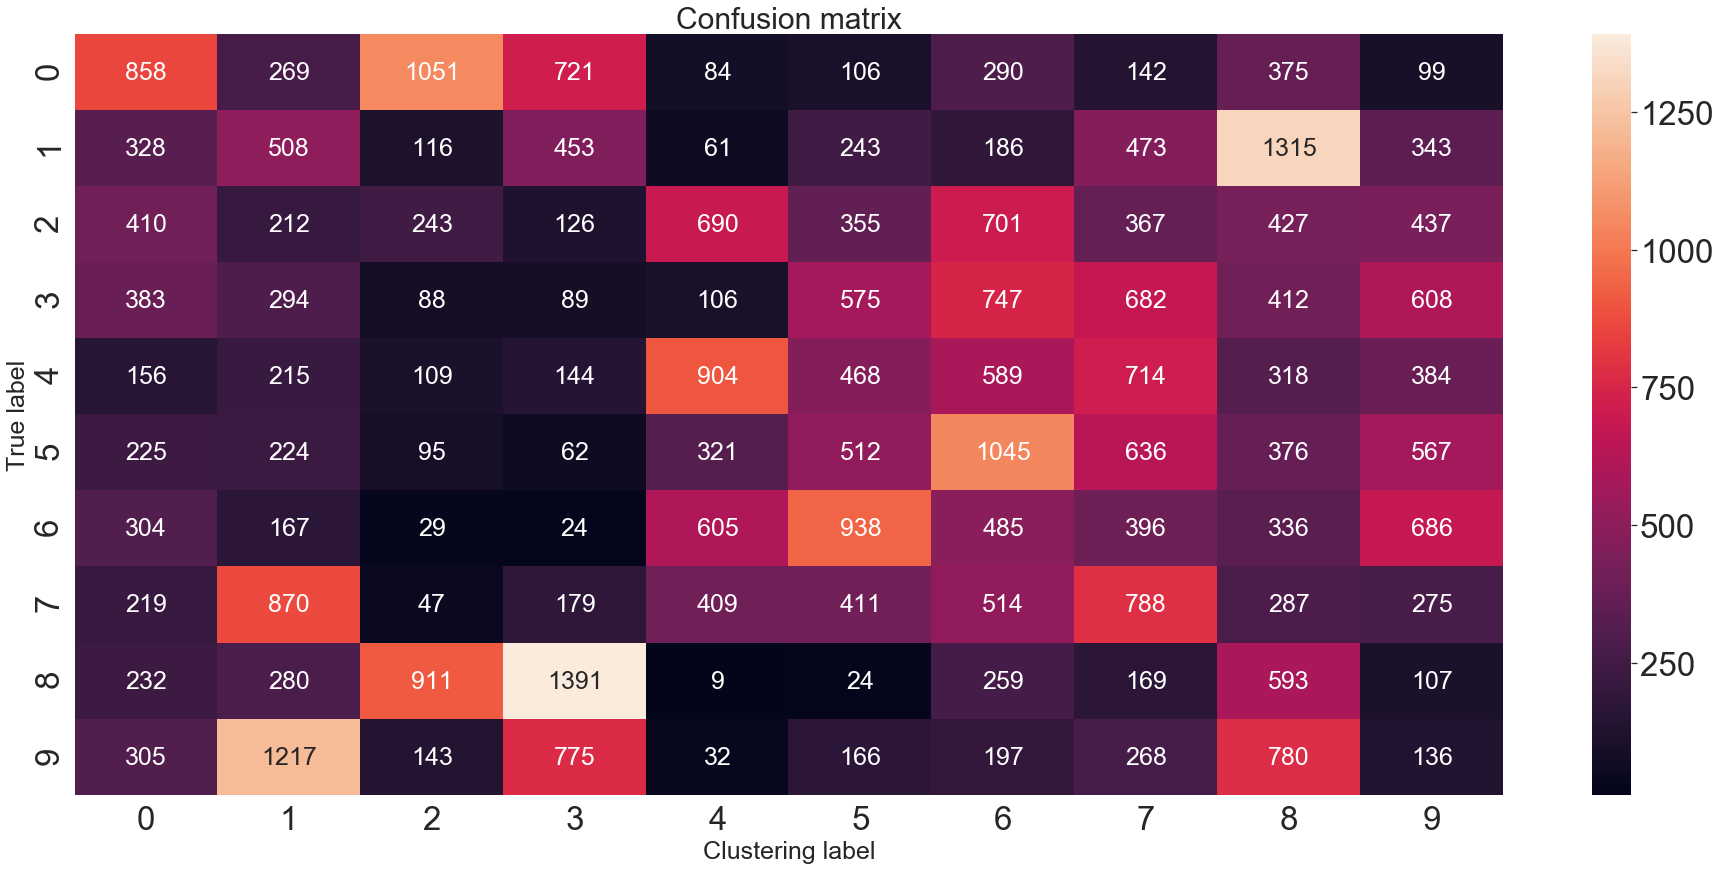

Accuracy =  25.4825  - Error =  74.5175
silhouette_avg 0.018522209
-------------------
epoch:  0
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 11s 264us/sample - loss: 0.9620 - accuracy: 0.1485
Accuracy =  24.9075  - Error =  75.0925
silhouette_avg 0.017882088
last silhouette_avg 0.018522209
caso 2


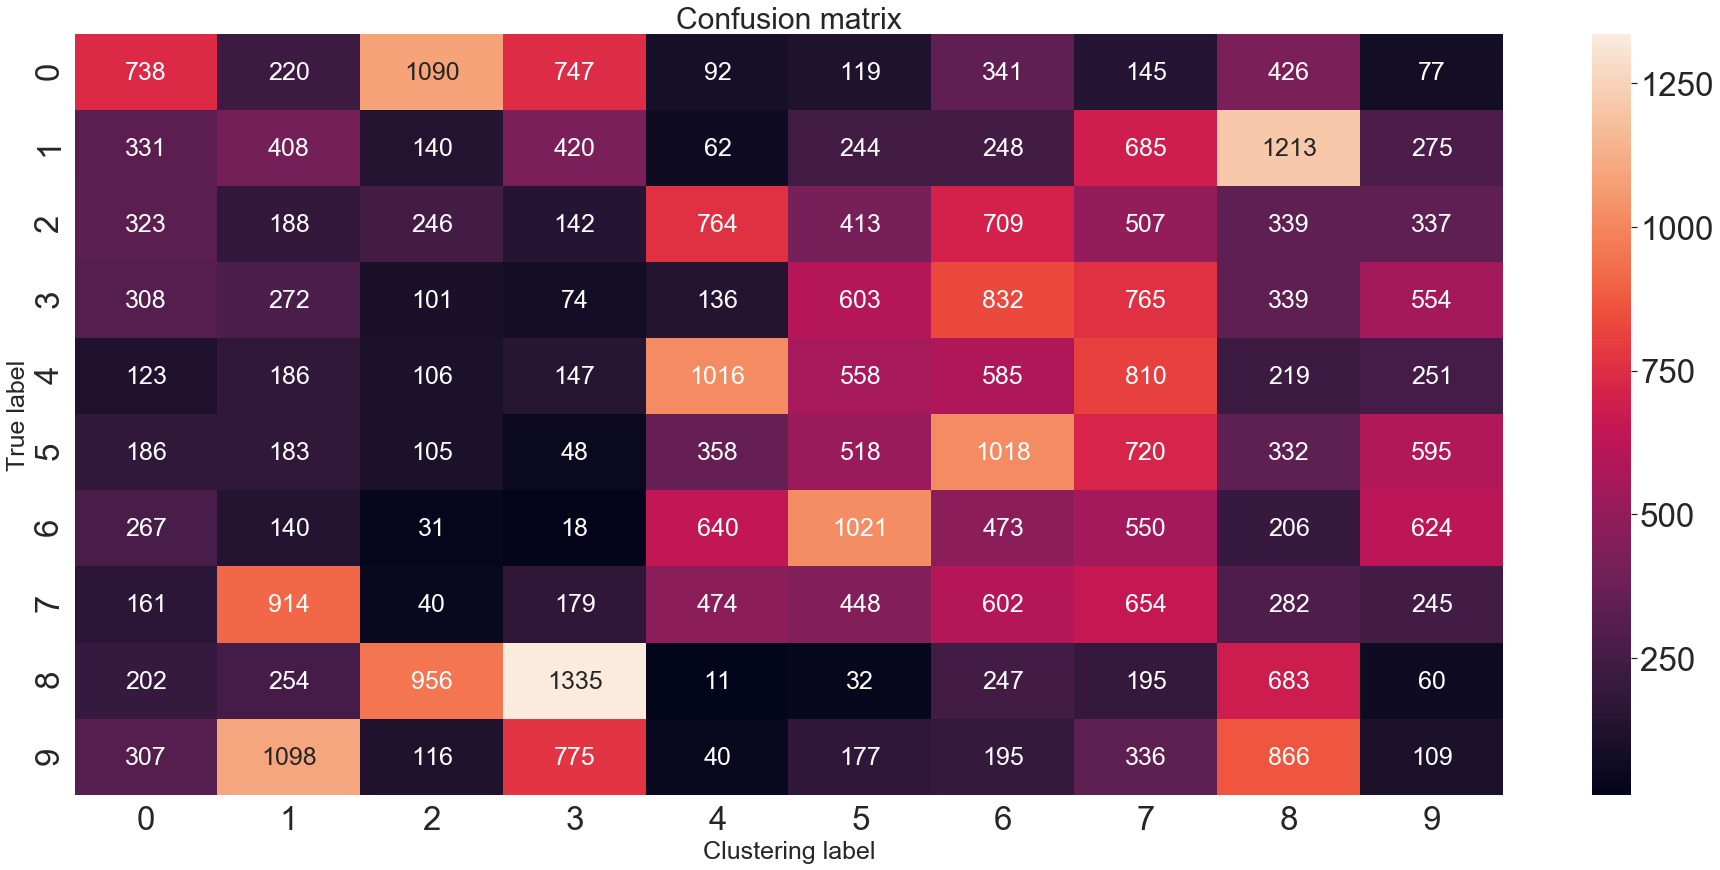

epoch:  1
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 11s 267us/sample - loss: 0.9271 - accuracy: 0.1630
Accuracy =  23.405  - Error =  76.595
silhouette_avg 0.02140097
last silhouette_avg 0.018522209
caso 3


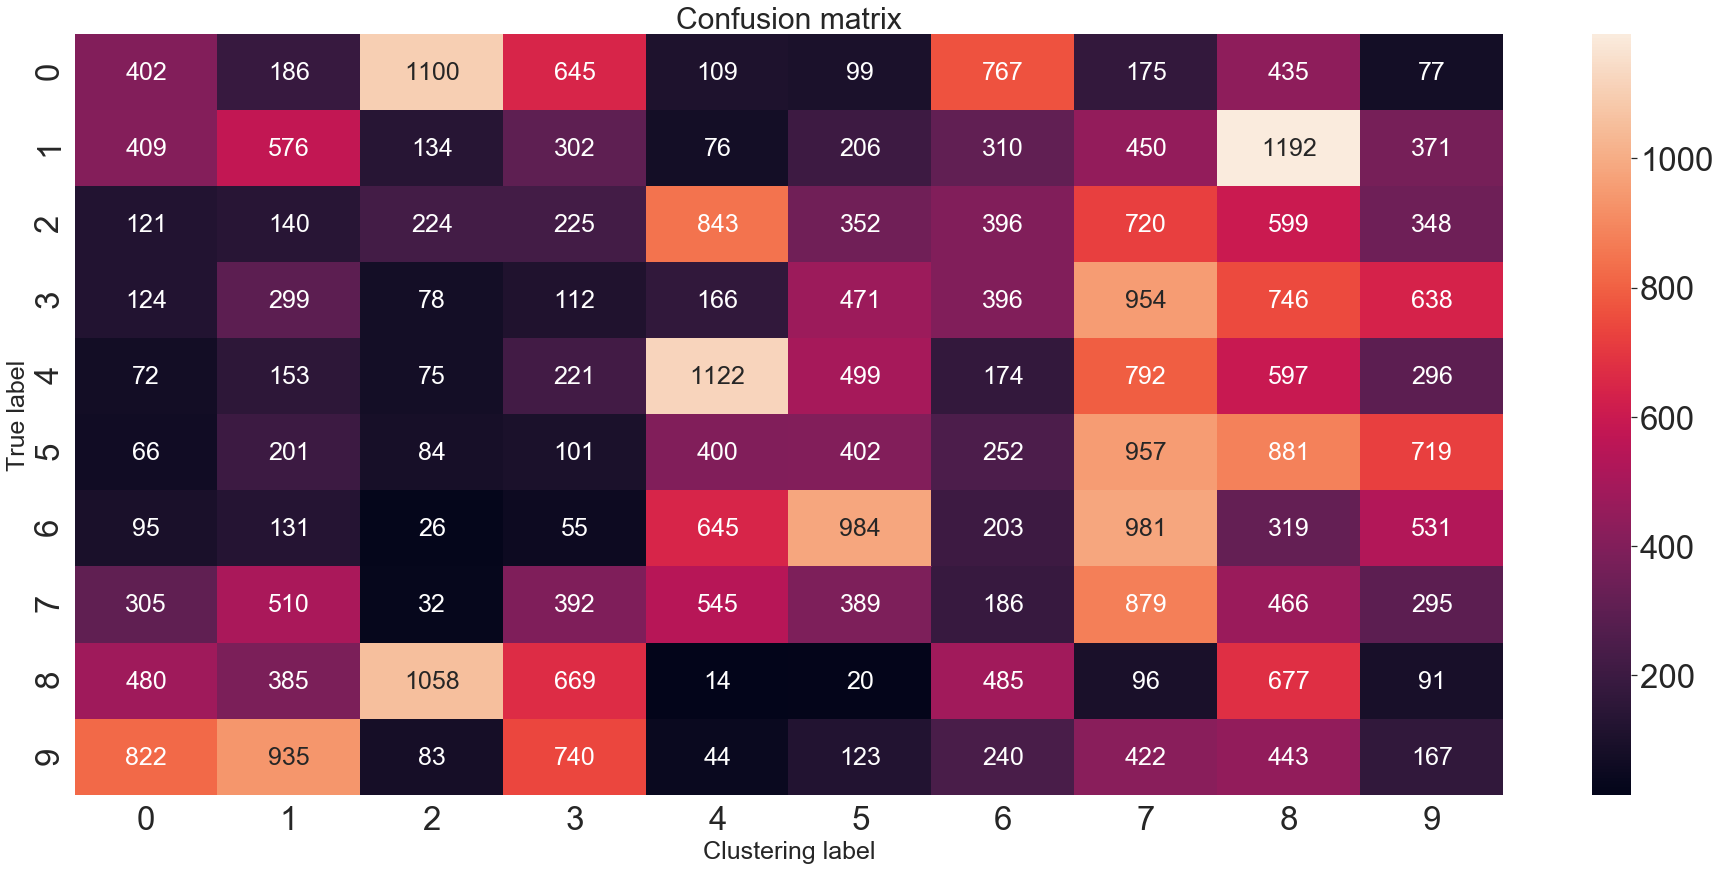

epoch:  2
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 11s 263us/sample - loss: 0.8836 - accuracy: 0.1736
Accuracy =  23.599999999999998  - Error =  76.4
silhouette_avg 0.022071438
last silhouette_avg 0.02140097
caso 3


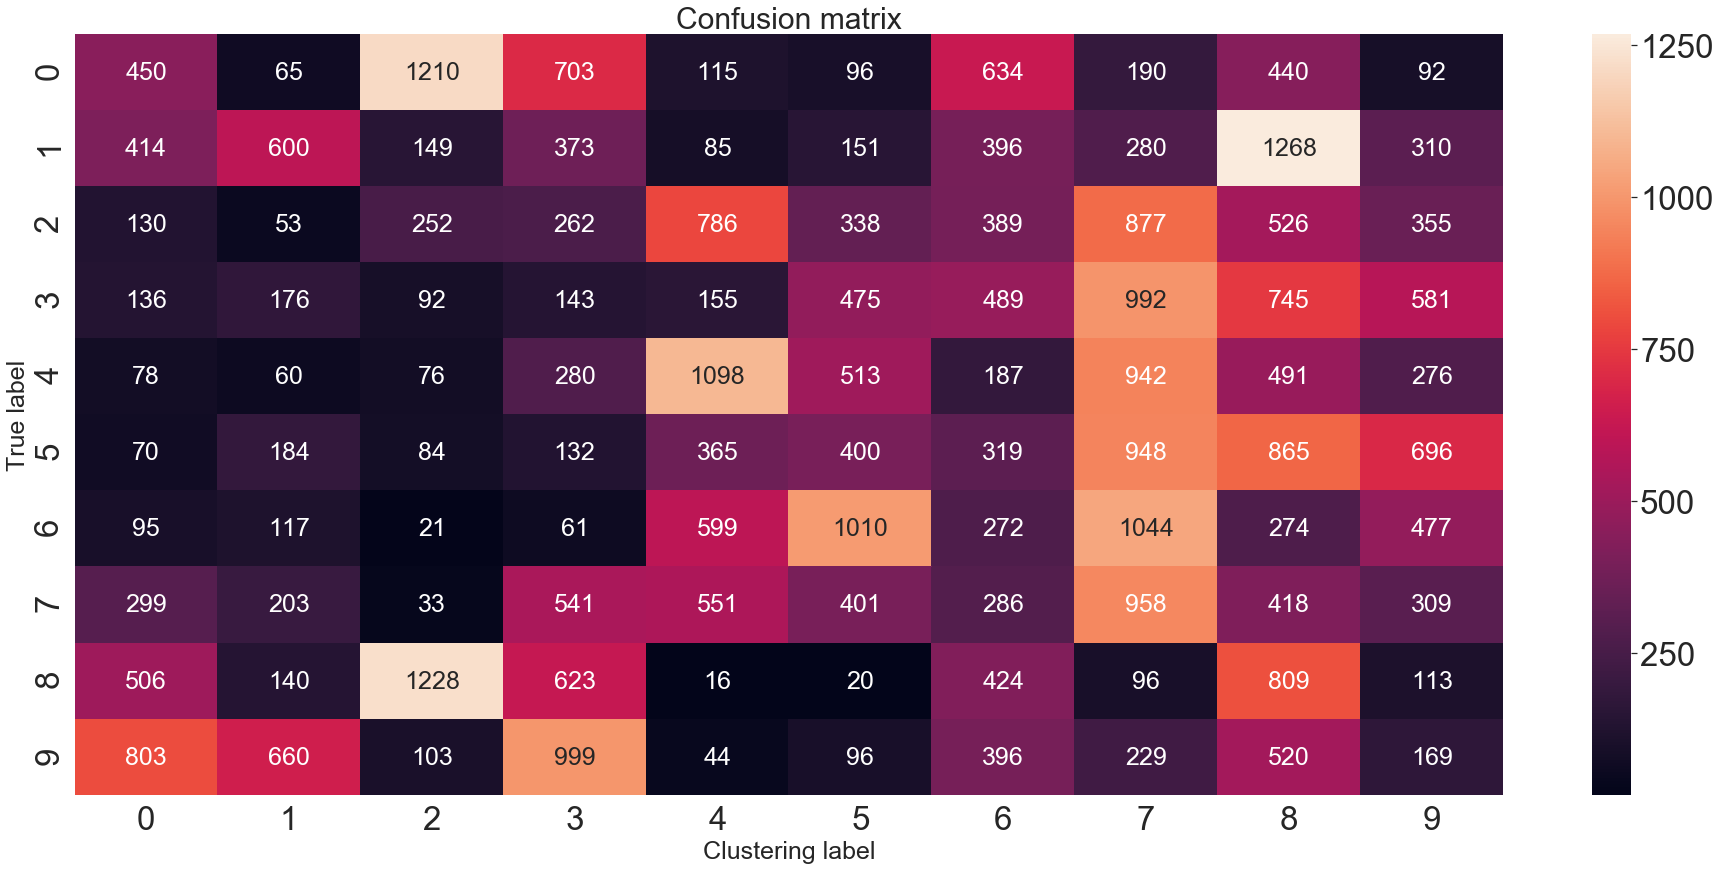

epoch:  3
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 11s 267us/sample - loss: 0.9883 - accuracy: 0.1793
Accuracy =  23.4175  - Error =  76.5825
silhouette_avg 0.026600074
last silhouette_avg 0.022071438
caso 3


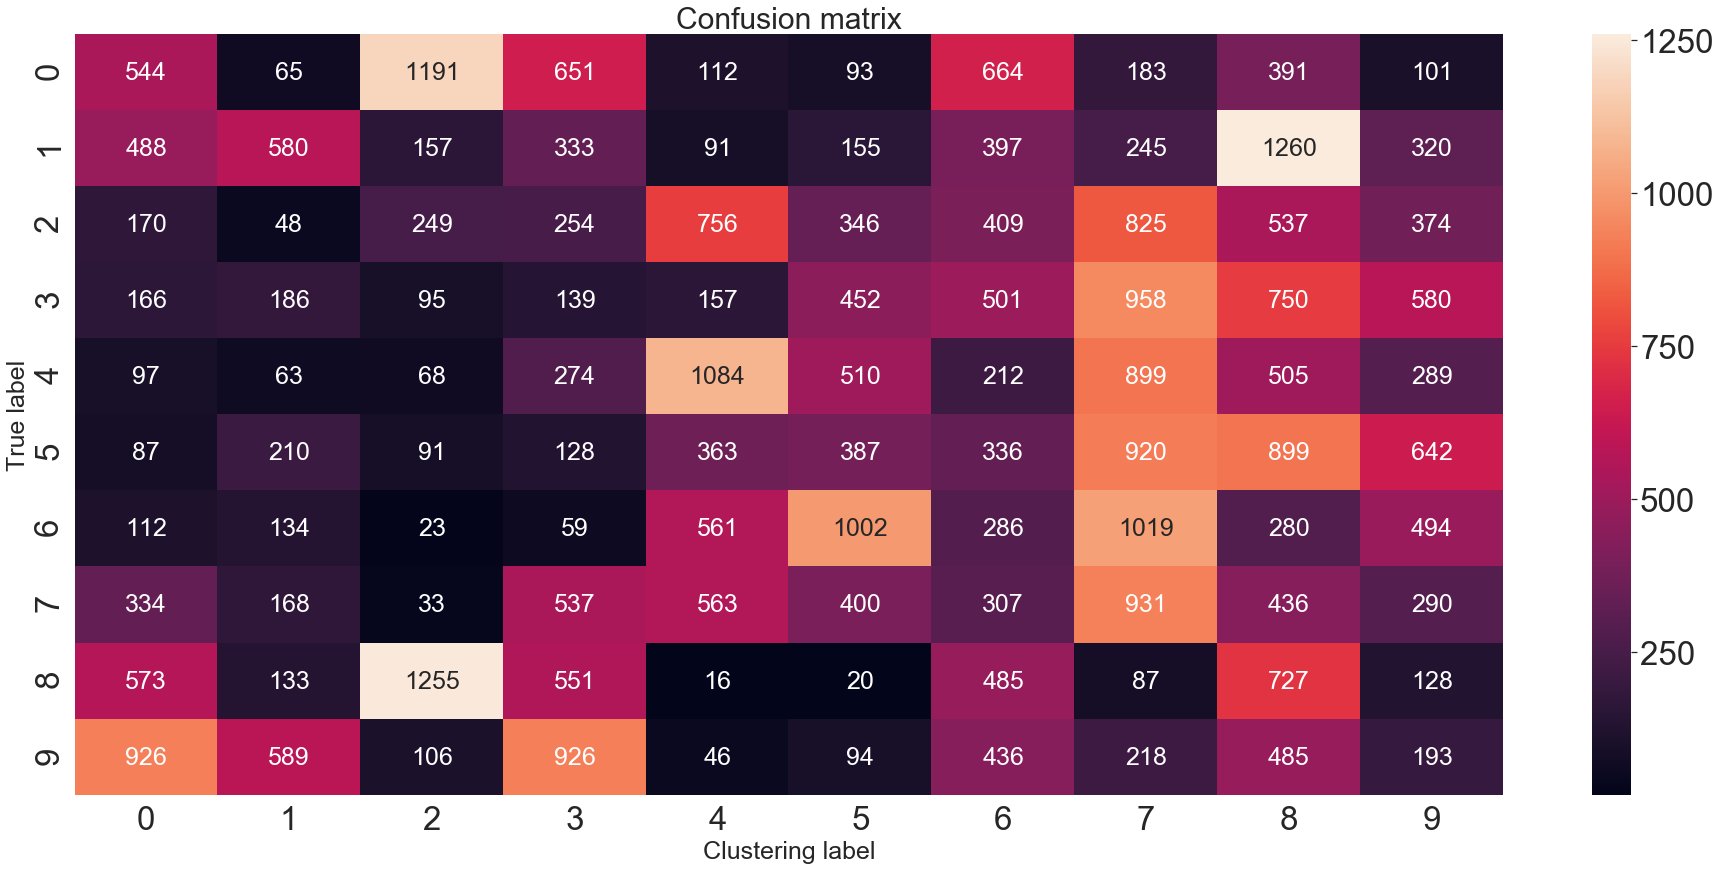

epoch:  4
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 11s 276us/sample - loss: 1.0312 - accuracy: 0.1945
Accuracy =  22.994999999999997  - Error =  77.005
silhouette_avg 0.035164505
last silhouette_avg 0.026600074
caso 3


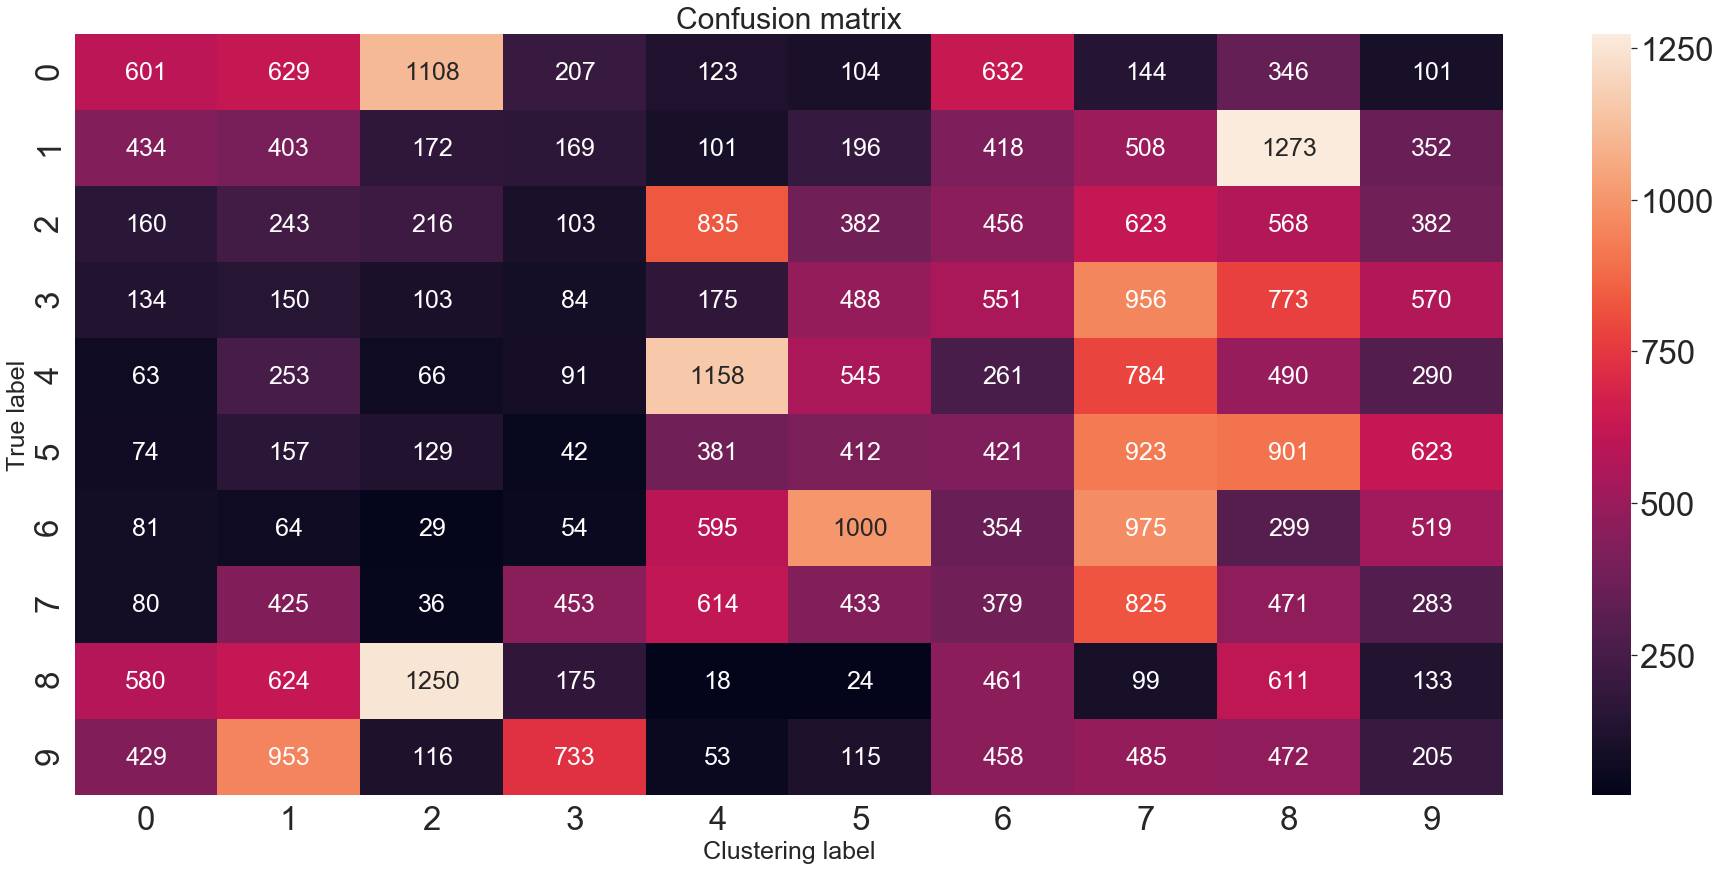

epoch:  5
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 11s 285us/sample - loss: 0.8024 - accuracy: 0.2246
Accuracy =  23.1  - Error =  76.9
silhouette_avg 0.034545317
last silhouette_avg 0.035164505
caso 2


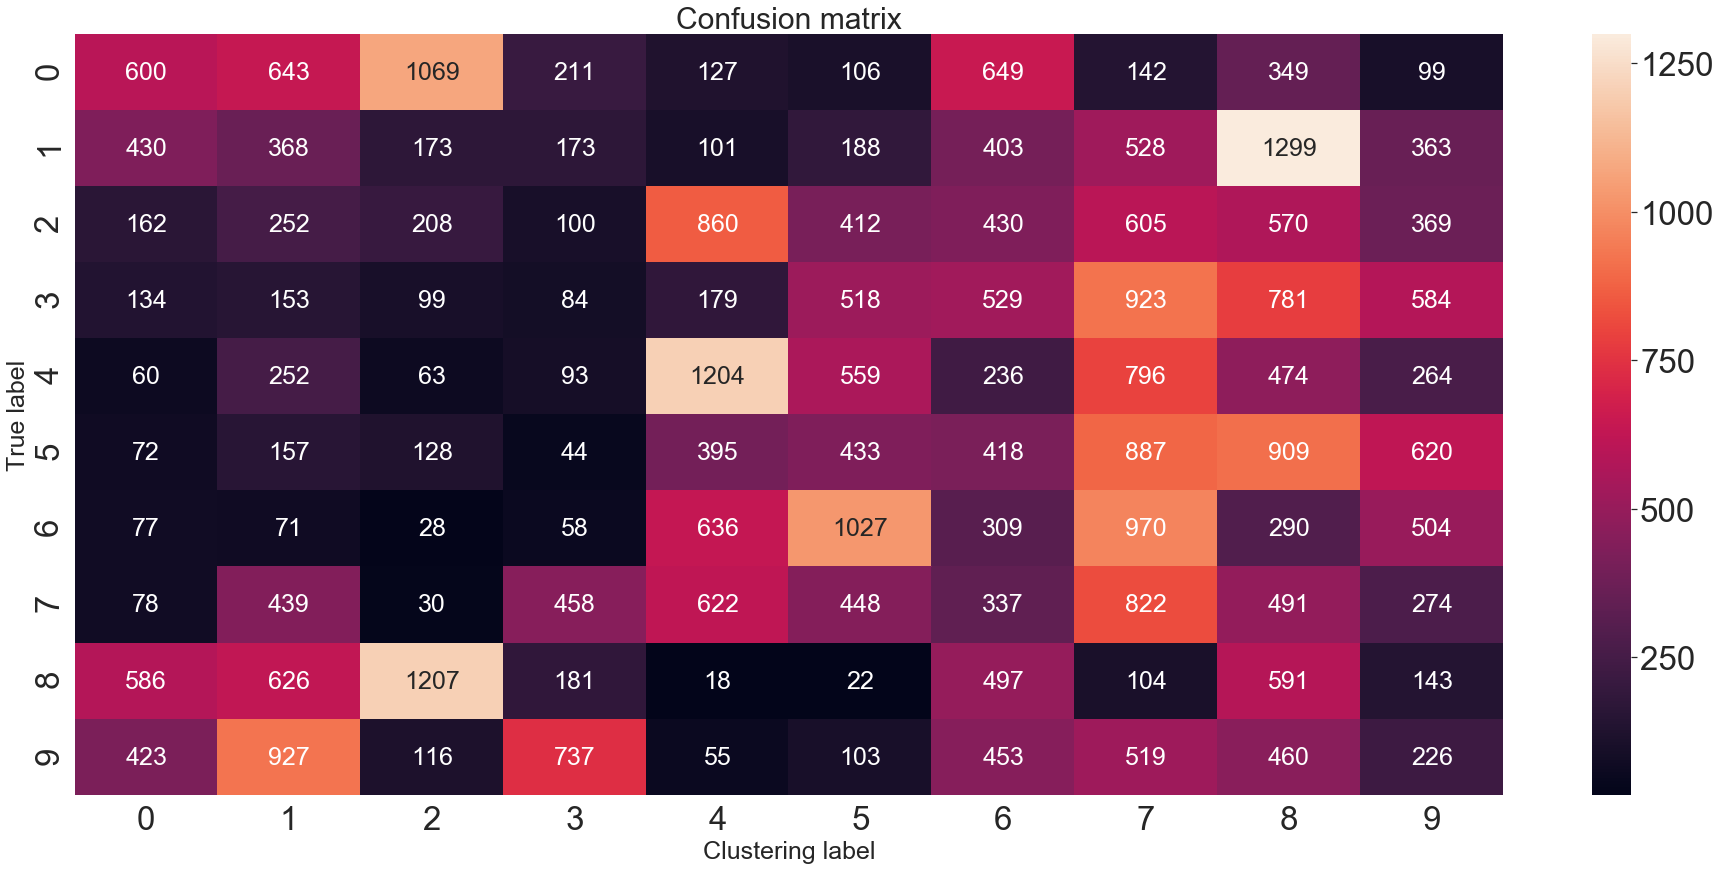

epoch:  6
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 11s 266us/sample - loss: 0.8201 - accuracy: 0.2380
Accuracy =  23.147499999999997  - Error =  76.8525
silhouette_avg 0.03533176
last silhouette_avg 0.035164505
caso 3


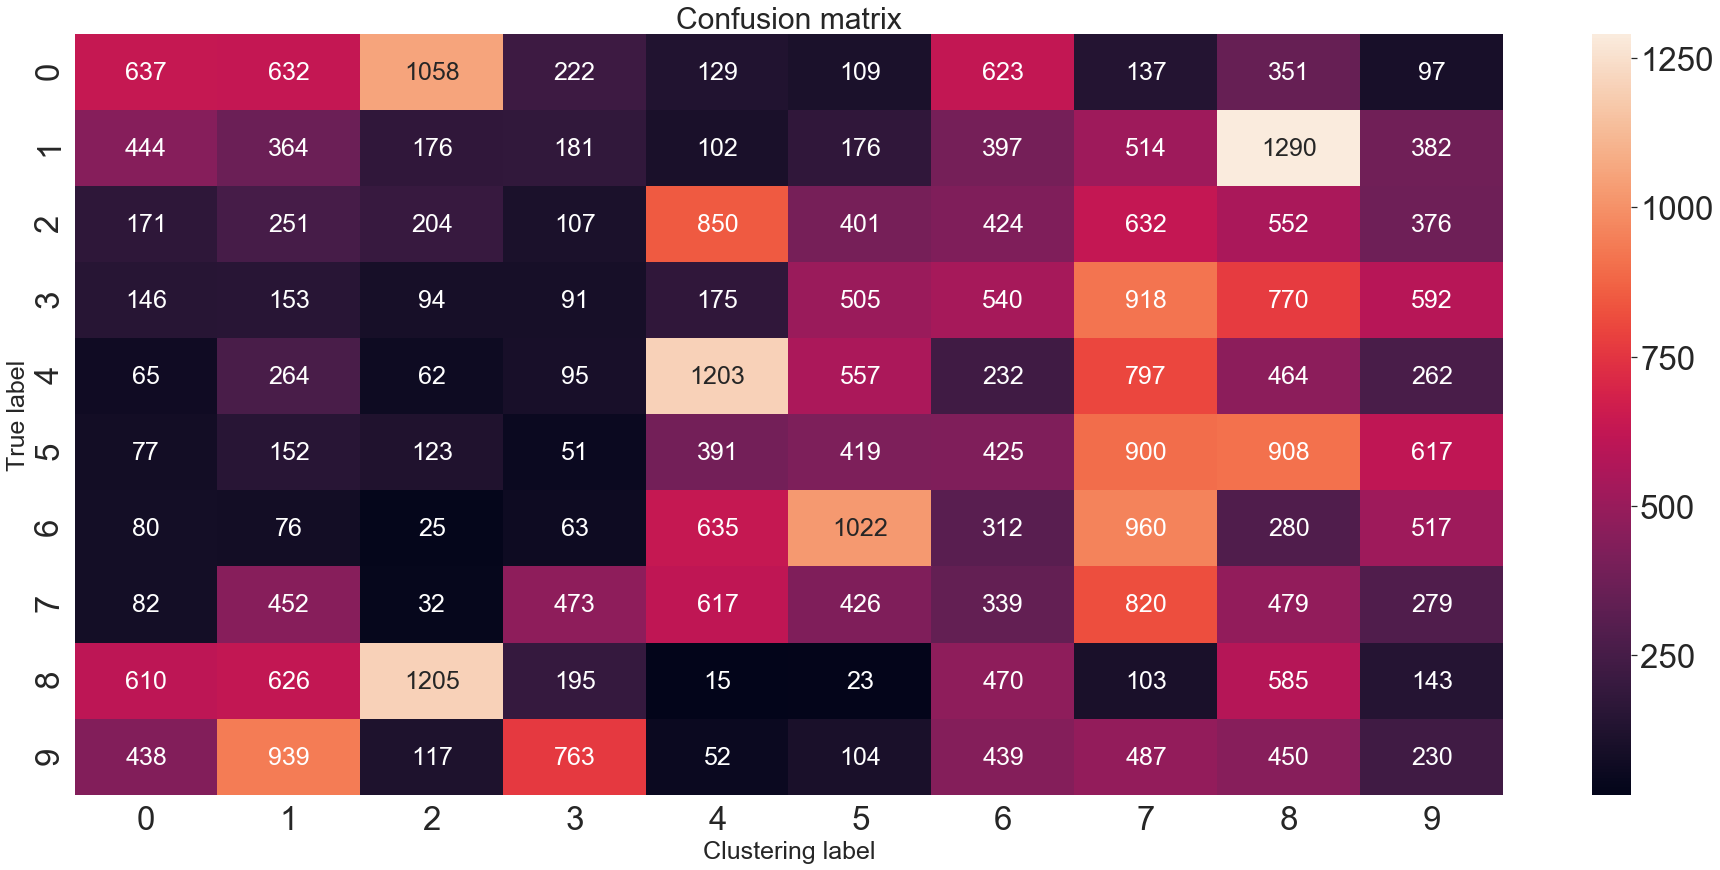

epoch:  7
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 25s 620us/sample - loss: 0.8248 - accuracy: 0.2489
Accuracy =  23.165  - Error =  76.835
silhouette_avg 0.036095448
last silhouette_avg 0.03533176
caso 3


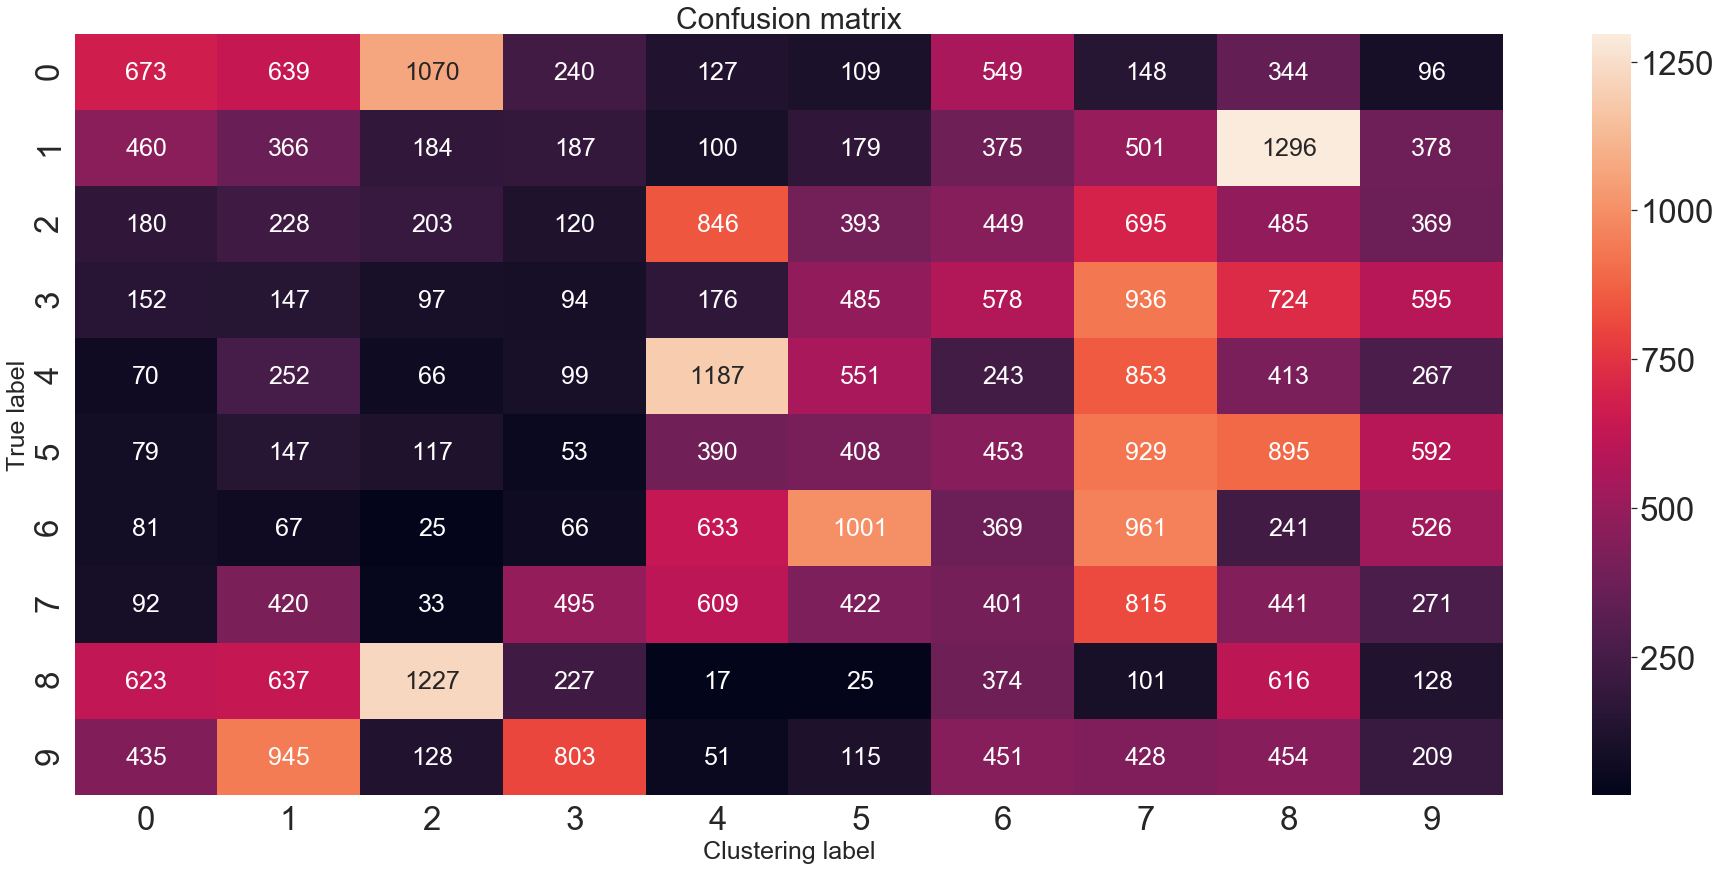

epoch:  8
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 17s 428us/sample - loss: 0.8297 - accuracy: 0.2623
Accuracy =  23.4675  - Error =  76.5325
silhouette_avg 0.0352717
last silhouette_avg 0.036095448
caso 2


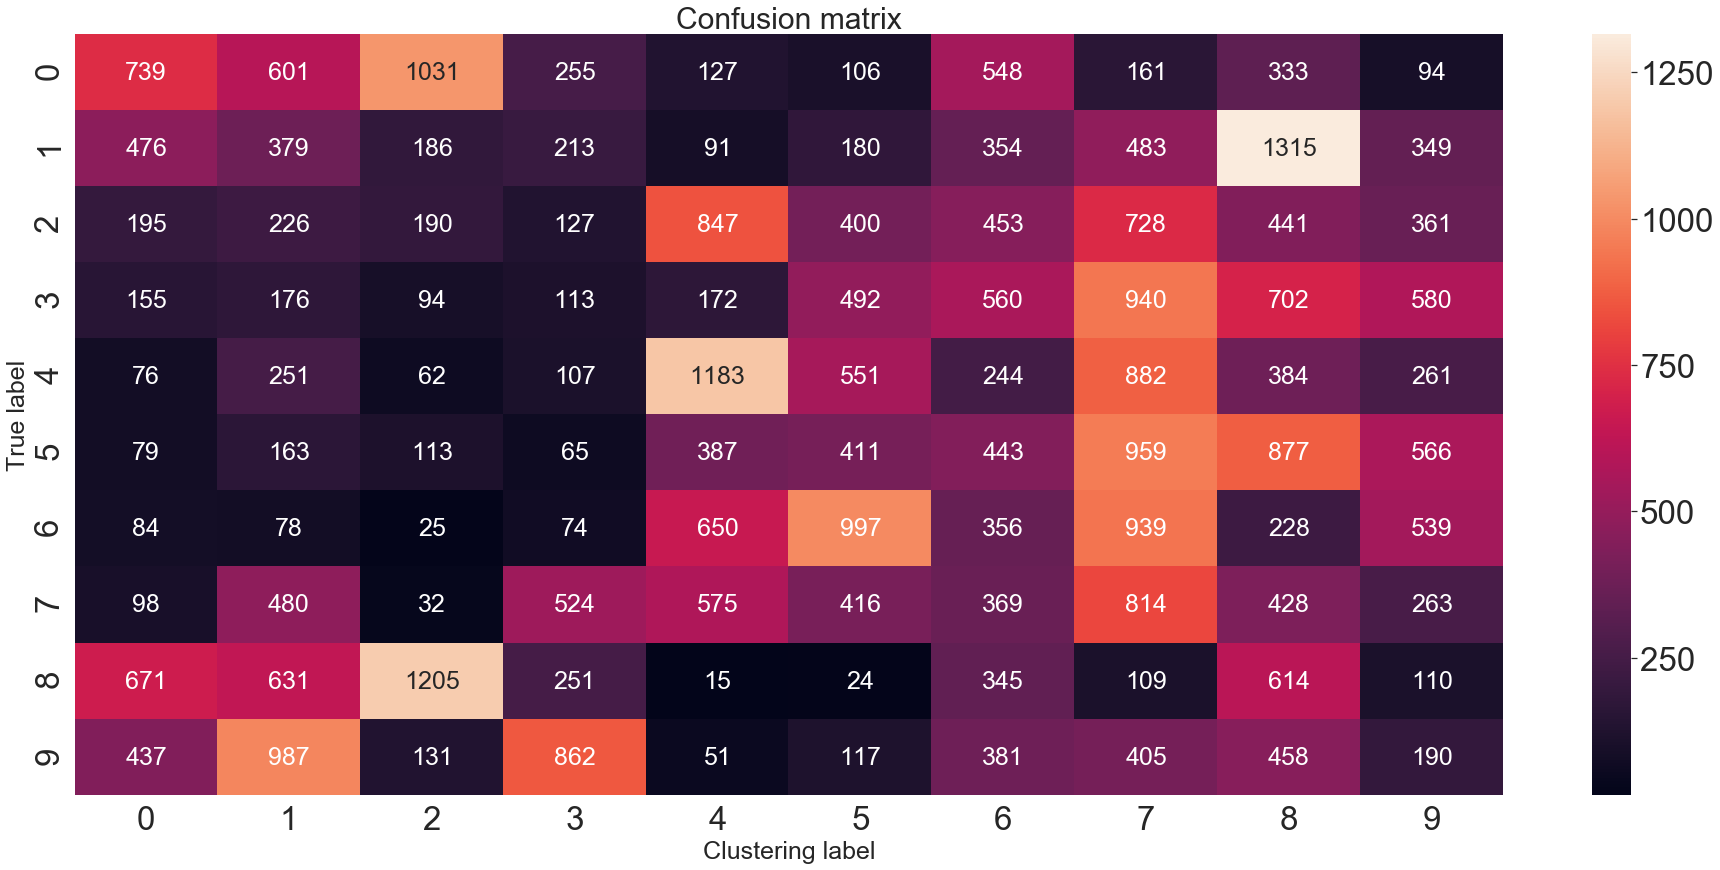

epoch:  9
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 14s 359us/sample - loss: 0.8272 - accuracy: 0.2774
Accuracy =  23.7475  - Error =  76.2525
silhouette_avg 0.03397828
last silhouette_avg 0.036095448
caso 2


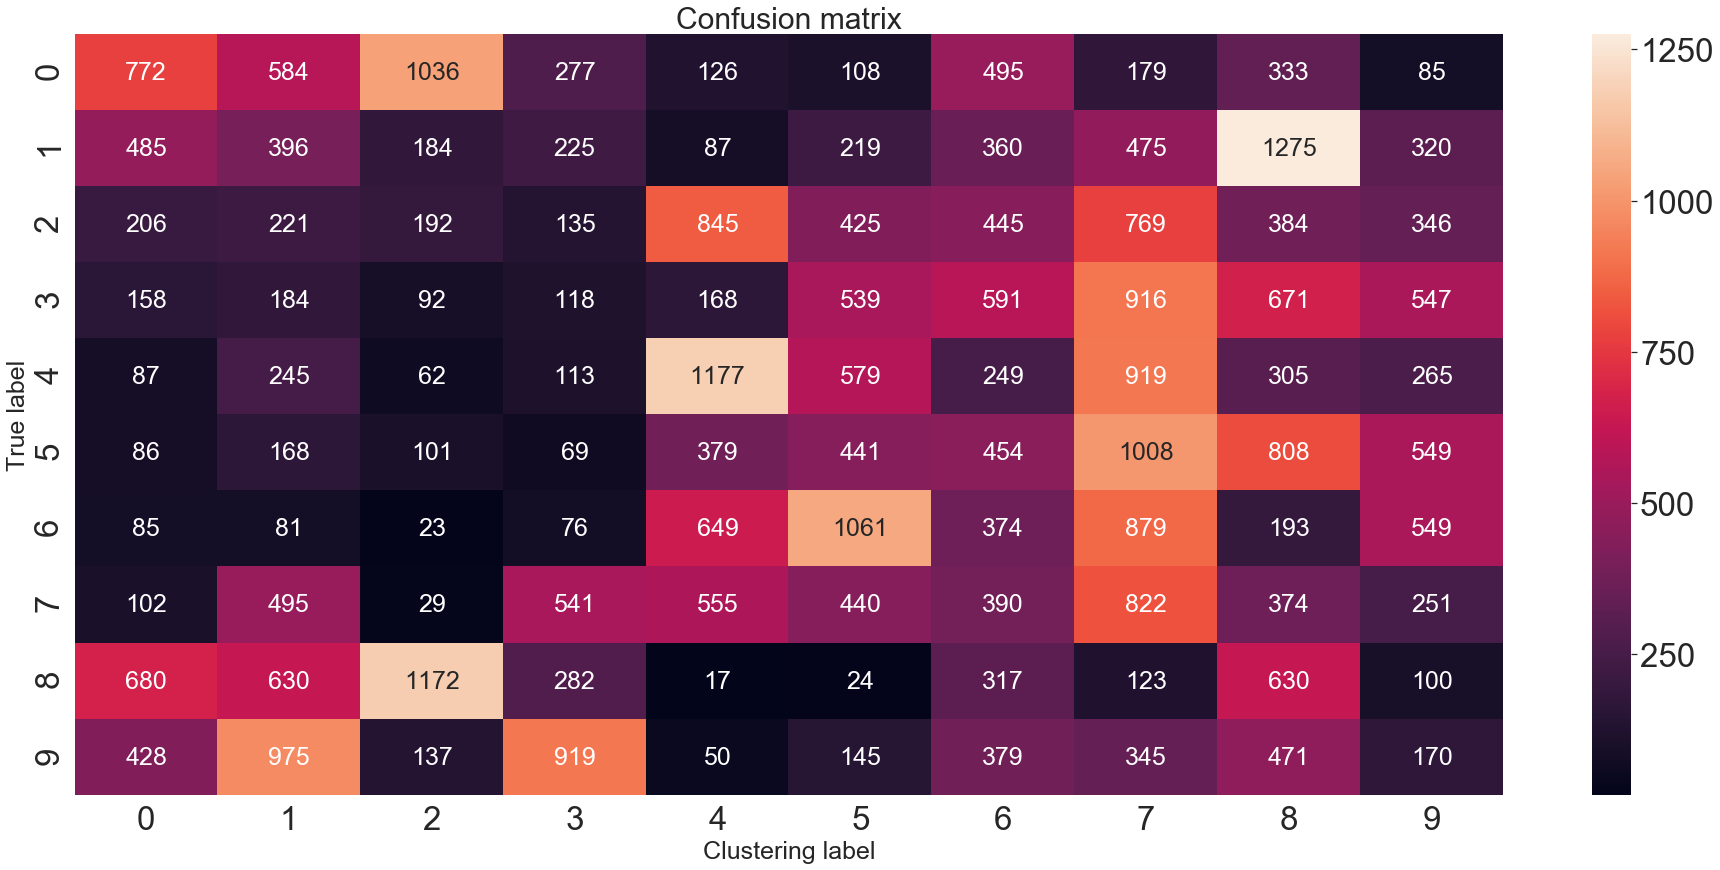

epoch:  10
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 15s 365us/sample - loss: 0.8340 - accuracy: 0.2826
Accuracy =  23.7225  - Error =  76.2775
silhouette_avg 0.035270546
last silhouette_avg 0.036095448
caso 2


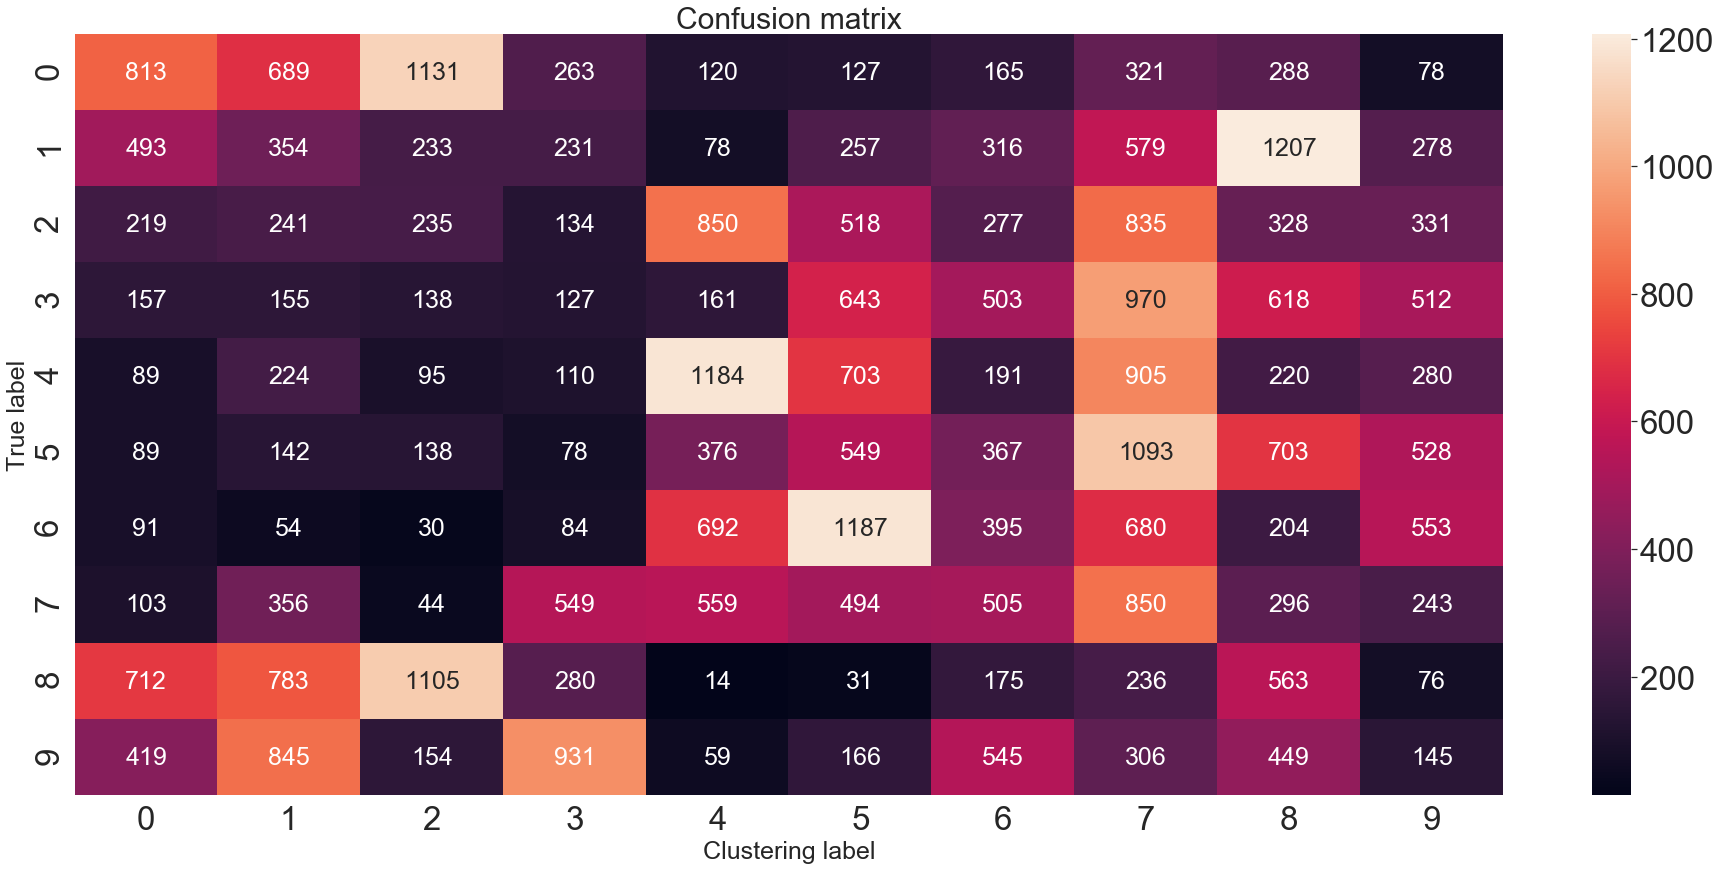

epoch:  11
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 14s 353us/sample - loss: 0.8346 - accuracy: 0.2811
Accuracy =  23.61  - Error =  76.39
silhouette_avg 0.035595726
last silhouette_avg 0.036095448
caso 2


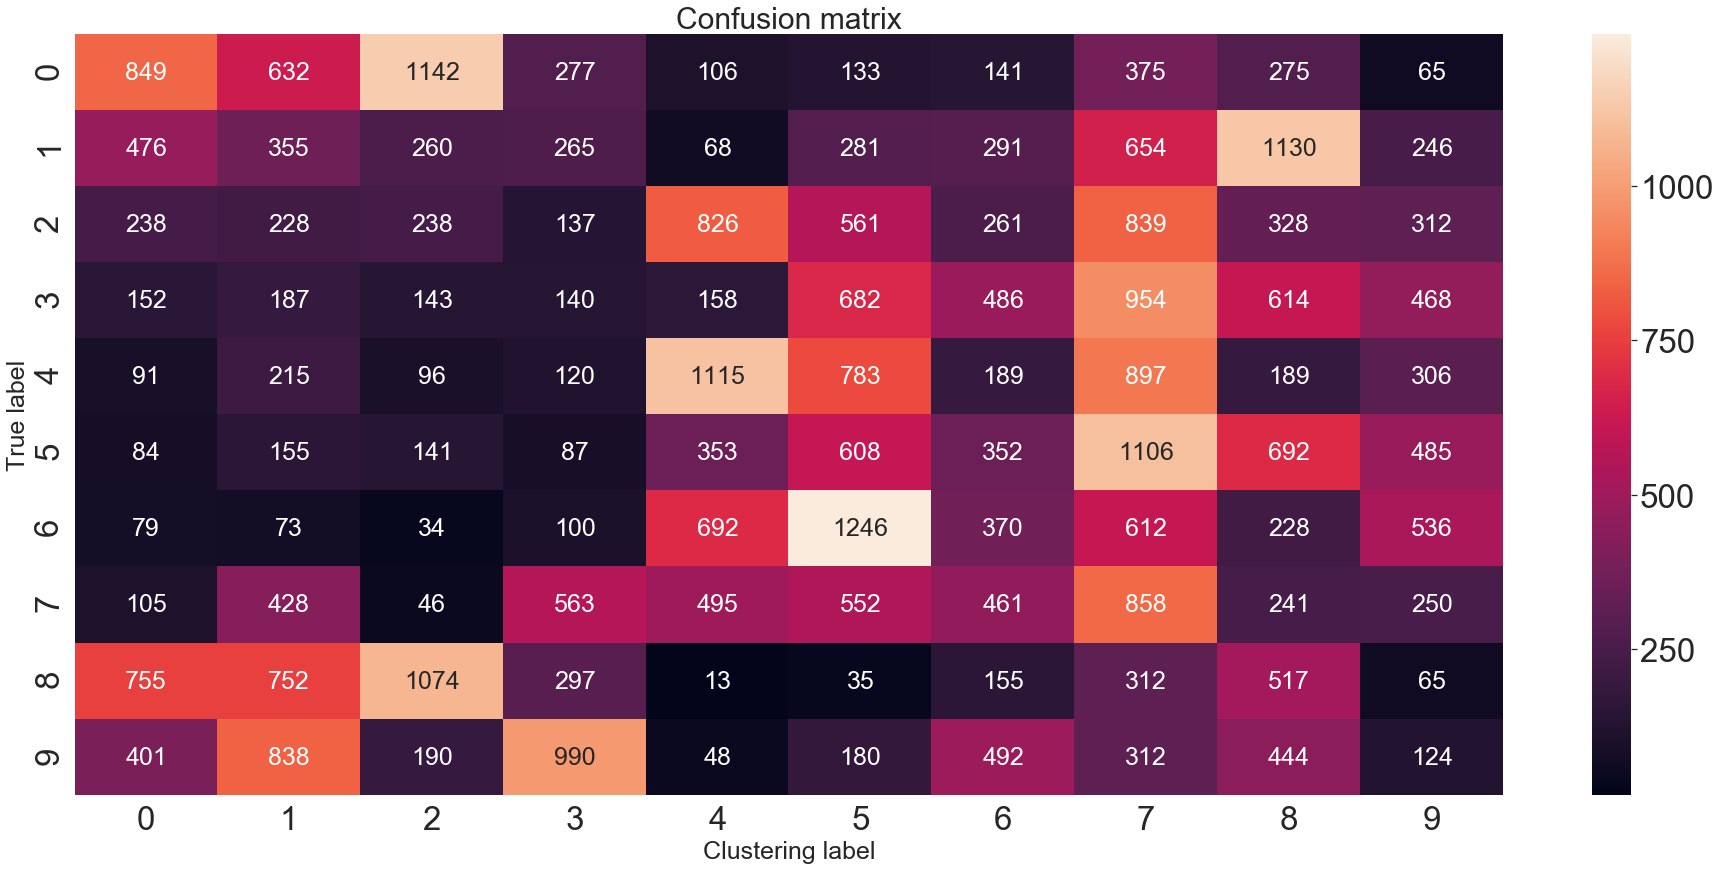

epoch:  12
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 20s 490us/sample - loss: 0.8547 - accuracy: 0.2796
Accuracy =  22.64  - Error =  77.36
silhouette_avg 0.040140536
last silhouette_avg 0.036095448
caso 3


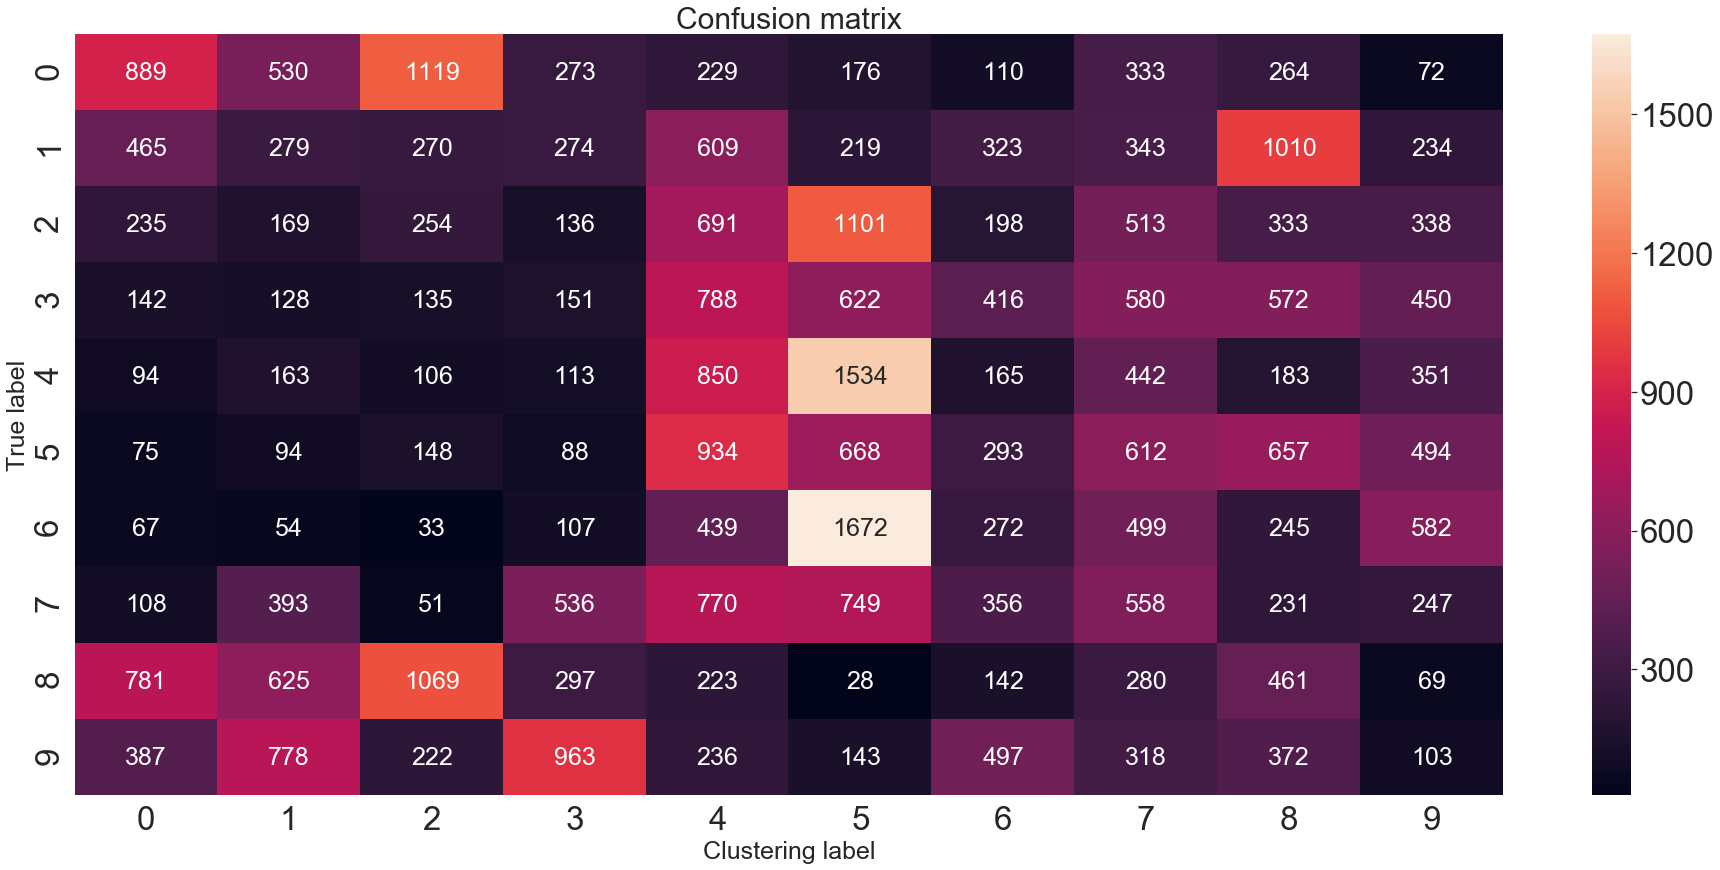

epoch:  13
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 23s 568us/sample - loss: 0.8144 - accuracy: 0.2733
Accuracy =  23.24  - Error =  76.75999999999999
silhouette_avg 0.052041918
last silhouette_avg 0.040140536
caso 3


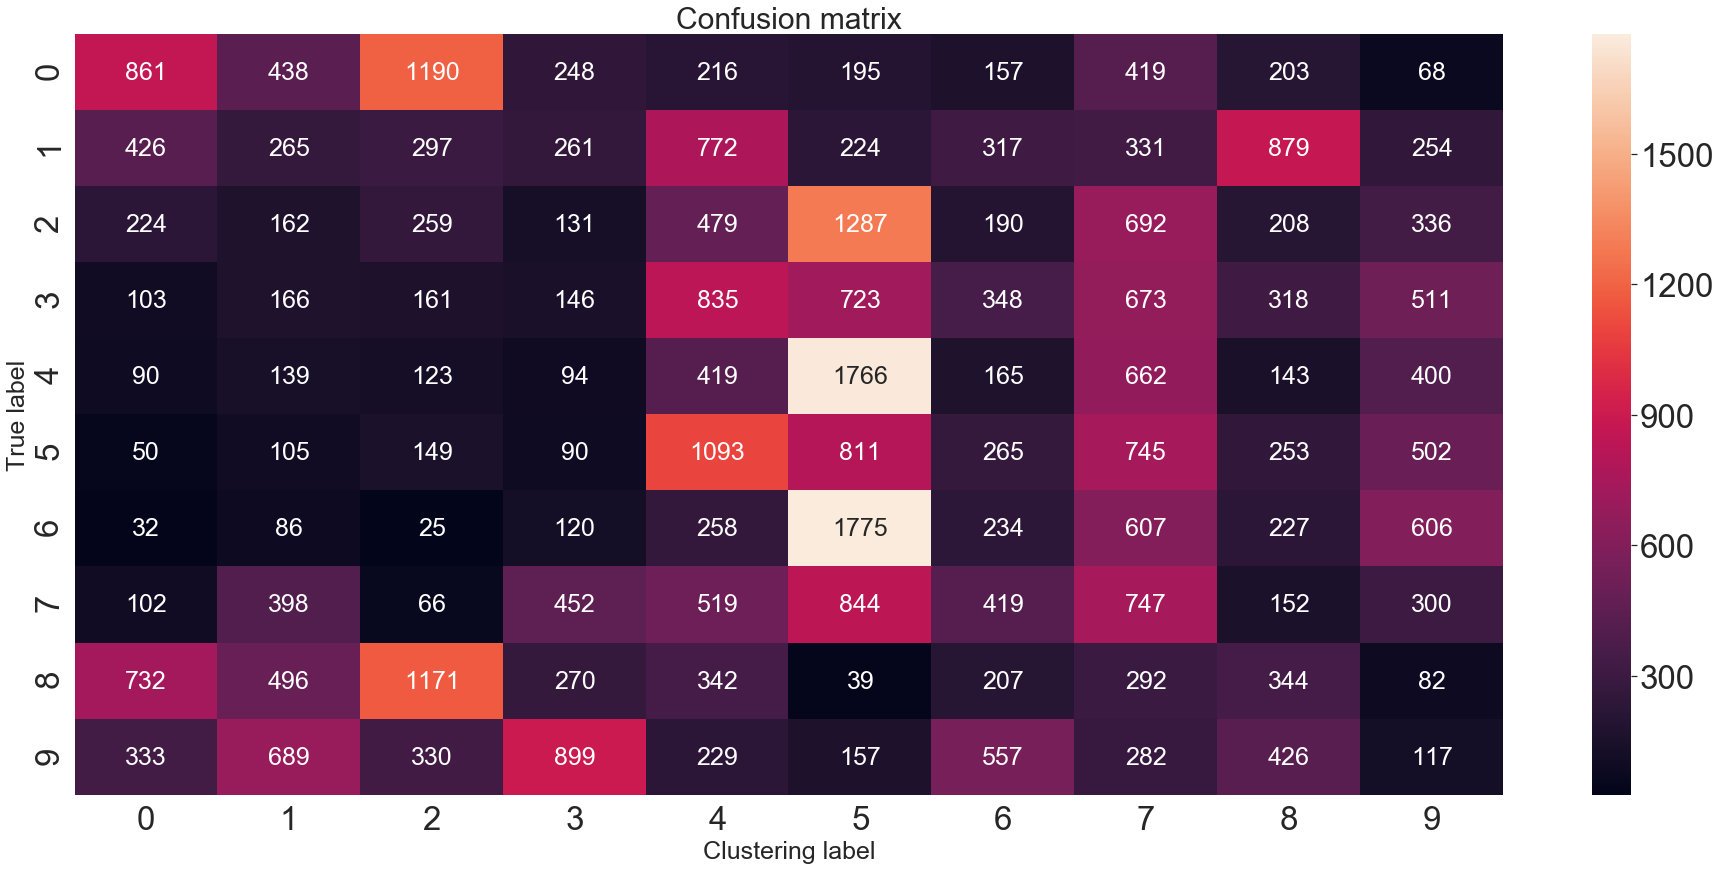

epoch:  14
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 25s 615us/sample - loss: 0.8408 - accuracy: 0.2761
Accuracy =  23.4075  - Error =  76.5925
silhouette_avg 0.058606
last silhouette_avg 0.052041918
caso 3


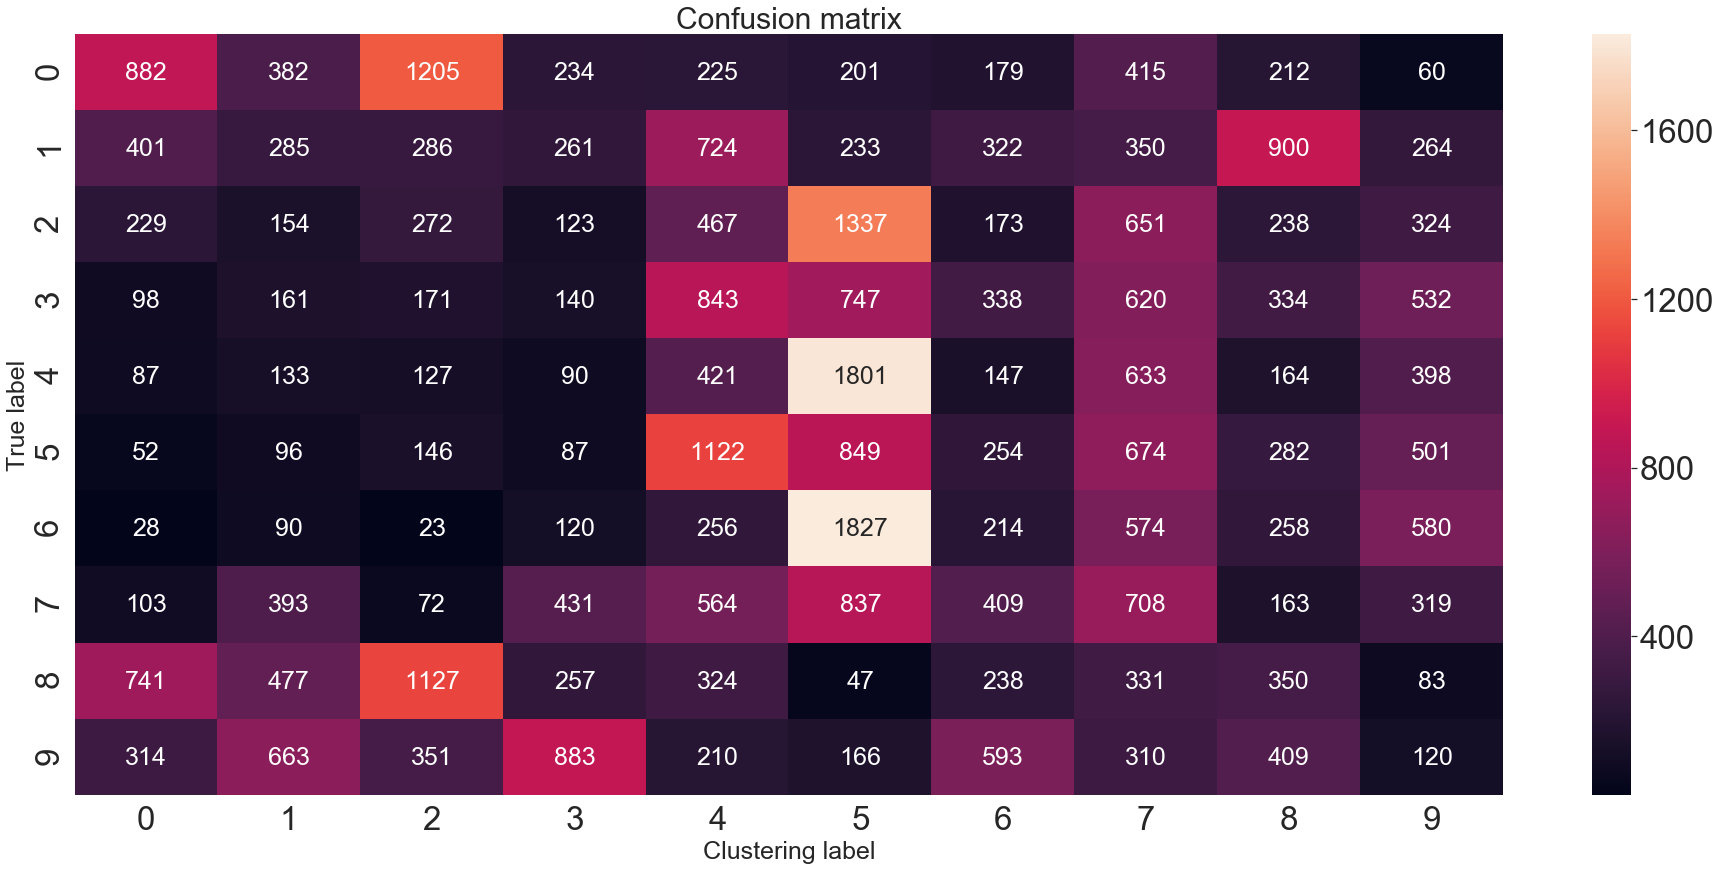

epoch:  15
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 13s 327us/sample - loss: 0.8315 - accuracy: 0.2847
Accuracy =  23.585  - Error =  76.415
silhouette_avg 0.061598726
last silhouette_avg 0.058606
caso 3


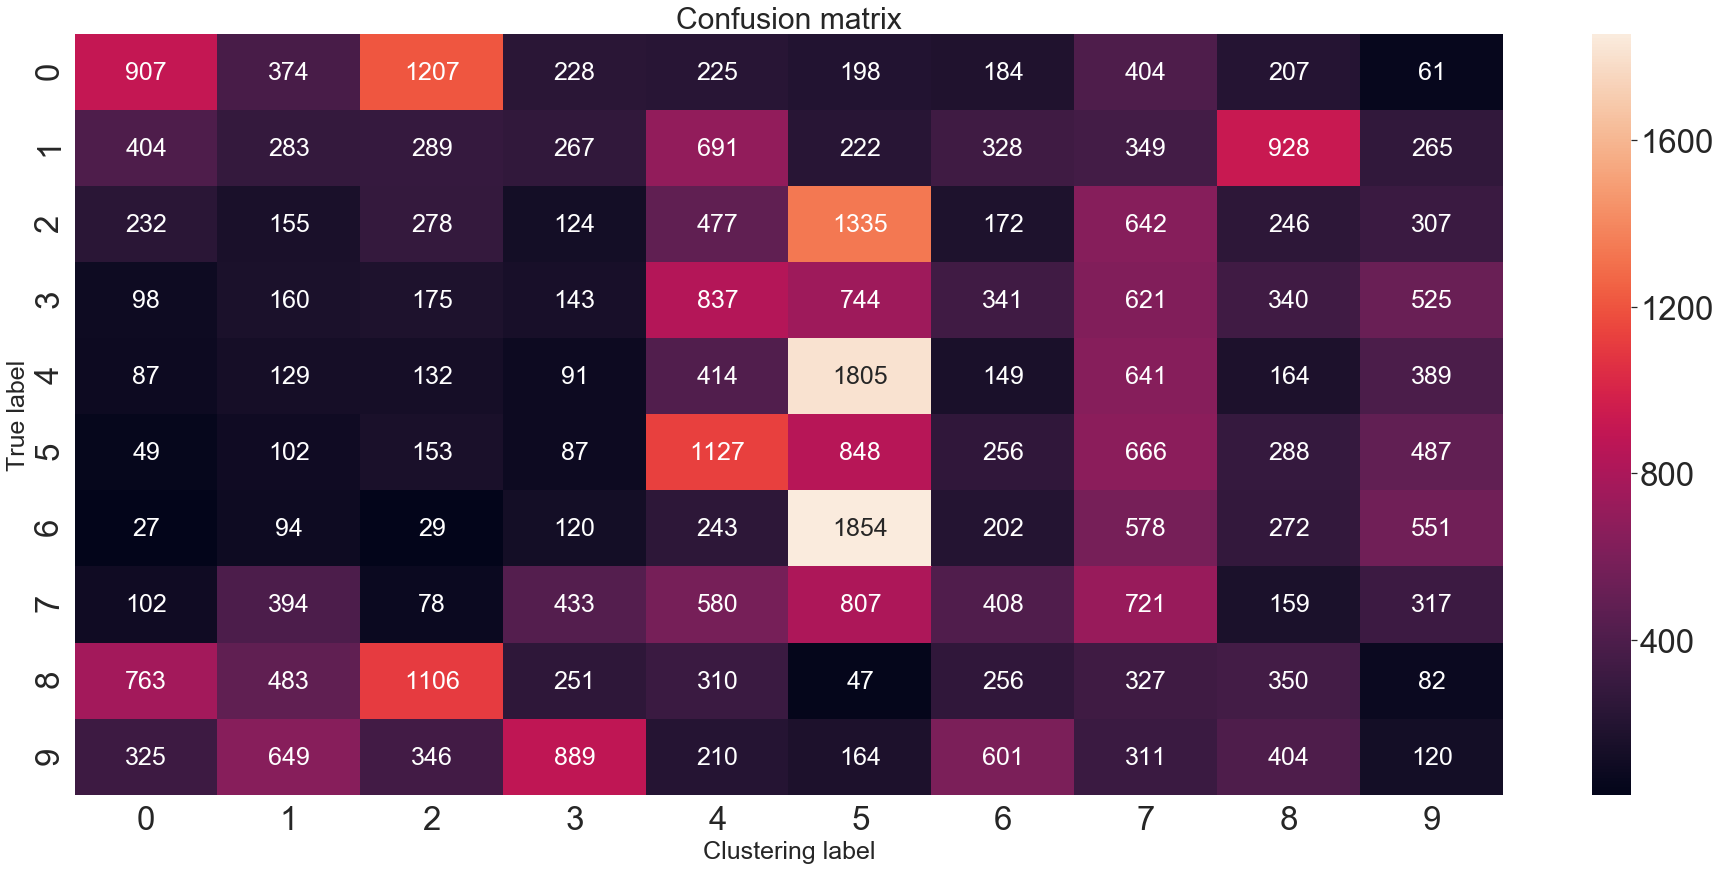

epoch:  16
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 11s 263us/sample - loss: 0.8405 - accuracy: 0.2910
Accuracy =  23.752499999999998  - Error =  76.2475
silhouette_avg 0.062171534
last silhouette_avg 0.061598726
caso 3


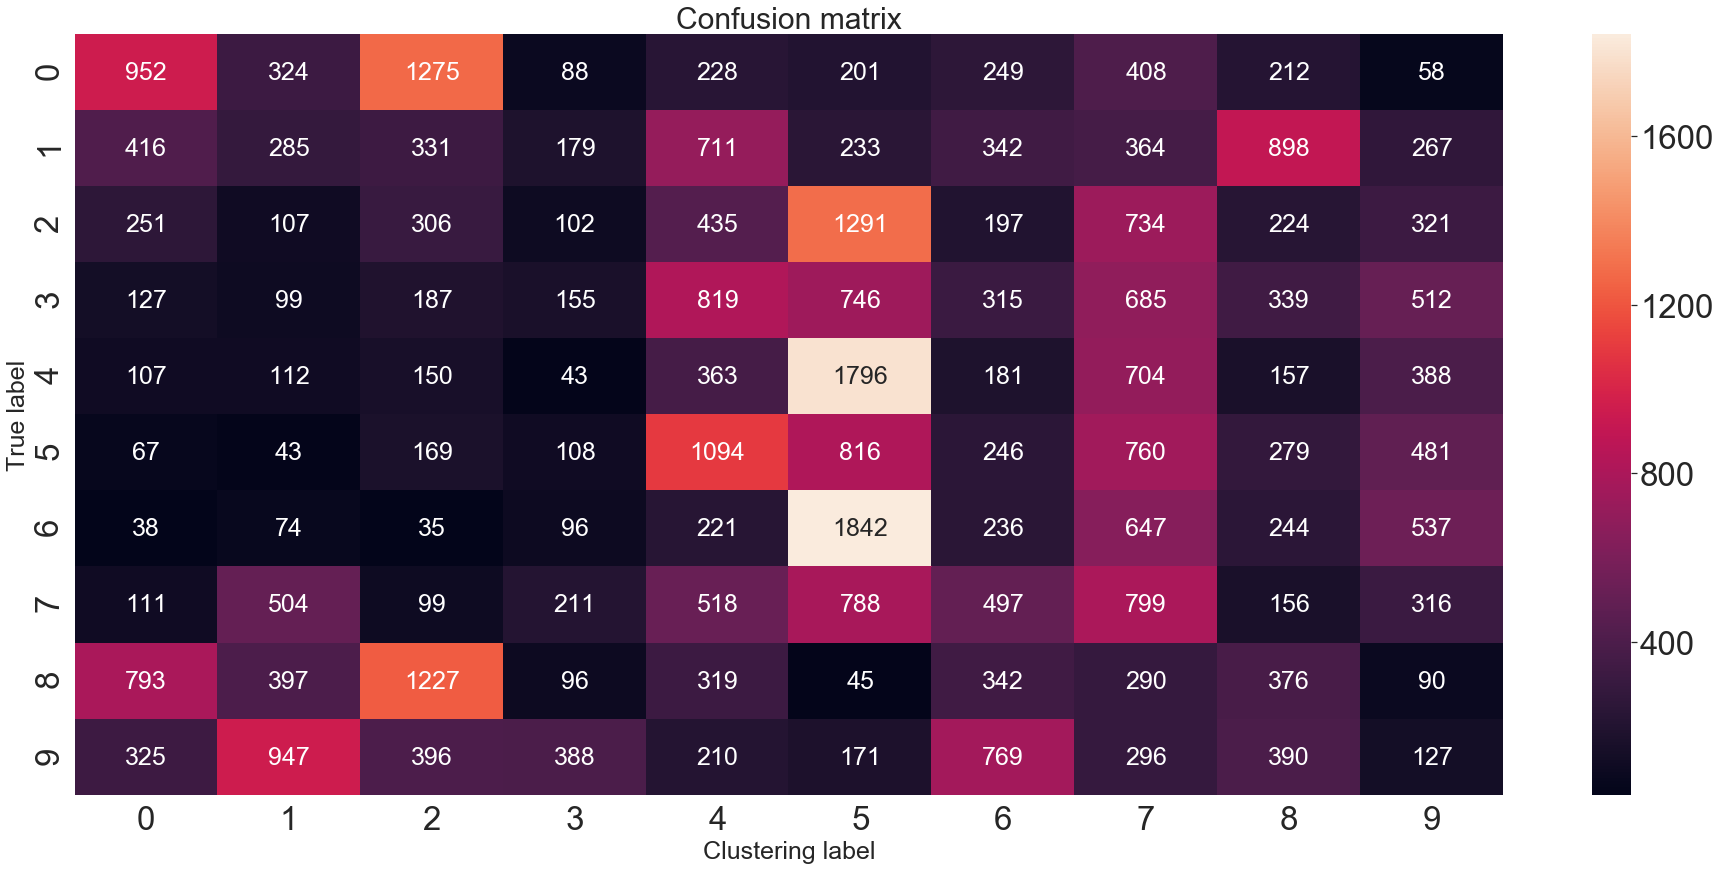

epoch:  17
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 11s 265us/sample - loss: 0.8412 - accuracy: 0.2907
Accuracy =  23.827499999999997  - Error =  76.1725
silhouette_avg 0.064776406
last silhouette_avg 0.062171534
caso 3


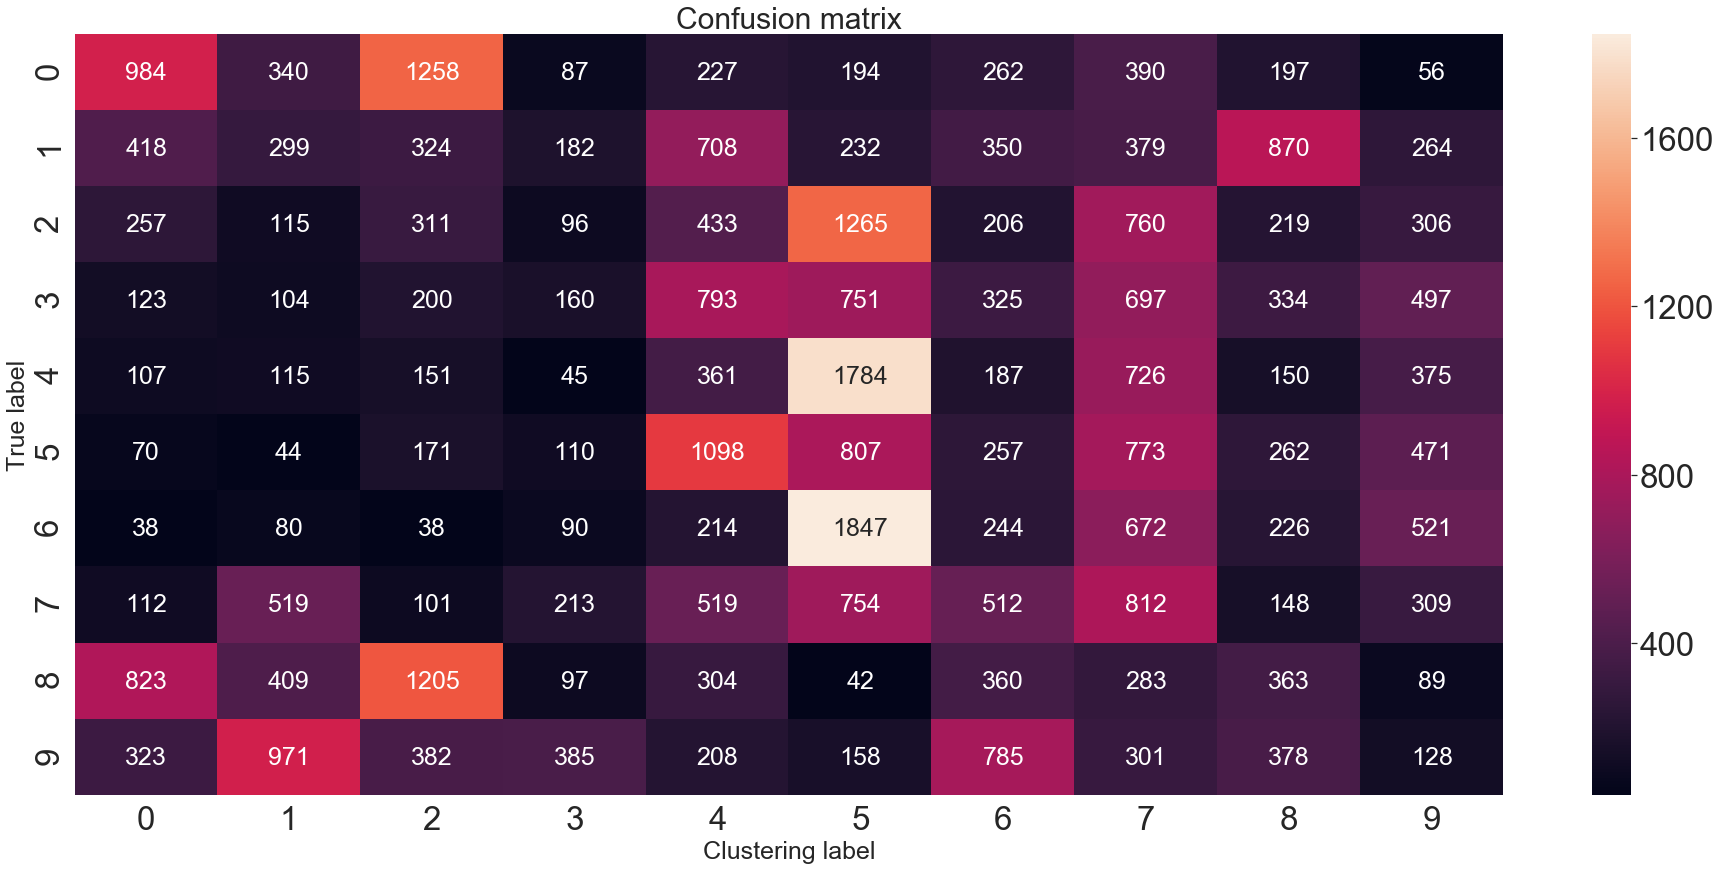

epoch:  18
  ...
    to  
  ['...']
Train on 40000 samples
40000/40000 [==============================] - 11s 269us/sample - loss: 0.8400 - accuracy: 0.2985
Accuracy =  22.325  - Error =  77.67500000000001


KeyboardInterrupt: 

In [38]:
arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\\autoencoder\cifar10'
_, model = deep_clustering_model(arq_path + '\Encoder_model_0.h5', input_shape = (32, 32, 3))

n_clusters = 10
n_classes = 10

arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\deep_clustering'

batch = load_data (arq_path)
i_crossVal=0
i_train = np.array([w for w in range(5) if not w == i_crossVal])
data_train, data_val, data_test, label_train, label_val, label_test = datasets_crossValitation (batch, i_train, i_crossVal=i_crossVal)
#arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\\autoencoder\clustering\cifar10'



lr = 0.0001
lr_dec = 0.7
max_perf_inc = 1.1
lr_inc = 1.05
model.add(Dense(n_clusters,activation='sigmoid'))
opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0, nesterov=False, name="SGD")
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

onehot_encoder = OneHotEncoder(sparse = False,categories = 'auto',dtype=np.float)

y_hat_encoded = model.predict( data_train )
y_hat = np.argmax(y_hat_encoded,axis=1)

features_model = tf.keras.Sequential()
#input_shape = (28,28,3)
z=0
while not model.layers[z].name=='encoderLayer_BN': # this is where I changed your code
    features_model.add(model.layers[z]) 
    z+=1    
features_model.add(model.layers[z]) 

features_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
y_features = features_model.predict(data_train)

print('y_features shape: ',y_features.shape)
features_model.summary()

kmeans = KMeans(n_clusters=n_clusters,max_iter=300, n_init=5,algorithm='full', verbose=0)
kmeans.fit(y_features)  # Train K-Means.


y_pred_kmeans = kmeans.predict(y_features)  # Train K-Means.


y_pred_kmeans = find_corresponded_cluster (y_pred_kmeans, y_hat, n_clusters)

y_pred_kmeans_oneHot = onehot_encoder.fit_transform(y_pred_kmeans.reshape(len(y_pred_kmeans),-1))


last_y_pred_kmeans = np.copy(y_pred_kmeans)



confusion_matrix=confusion_matrix_fn(y_pred_kmeans,np.squeeze(label_train), n_classes=n_classes, n_clusters=n_clusters)
plot_cm(confusion_matrix)
acc,err = accuracy(n_clusters, confusion_matrix)
print('Accuracy = ',acc*100,' - Error = ',err*100)

silhouette_avg = silhouette_score(y_features, np.squeeze(y_pred_kmeans),metric='euclidean')
sample_silhouette_values = silhouette_samples(y_features, np.squeeze(y_pred_kmeans),metric='euclidean')
#sample_silhouette_values = silhouette_samples(data_train.reshape((len(data_train),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
#silhouette_avg = silhouette_score(data_train.reshape((len(data_train),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
    
print('silhouette_avg', silhouette_avg)

model.save(arq_path + '\deepKmeans_model_'+str(i_crossVal)+'.h5')

epochs = 1

cont = 0

print('-------------------')

for i in range(150):
    
    
    
    if cont == 10:
        break

    print('epoch: ',i)
    
    model = tf.keras.models.load_model(arq_path + '\deepKmeans_model_'+str(i_crossVal)+'.h5')
    
    
    indexes = generate_indexes_epoch(n_clusters, y_pred_kmeans)
  #  indexes = np.arange(len(y_pred_kmeans))
  #  del model_aux
    w = (sample_silhouette_values[(indexes).astype(int)] - np.min(sample_silhouette_values)) / (np.max(sample_silhouette_values) - np.min(sample_silhouette_values))
    
    last_y_pred_kmeans = np.copy(y_pred_kmeans)
    last_silhouette_avg = silhouette_avg
    #model.fit( x=data_train[(indexes).astype(int),:], y=y_pred_kmeans_oneHot[(indexes).astype(int)], validation_data=(data_val, y_pred_kmeans_oneHot_val) ,batch_size=256, epochs=1 )
    model.fit( x=data_train[(indexes).astype(int),:], y=y_pred_kmeans_oneHot[(indexes).astype(int)] ,batch_size=256, epochs=epochs ,sample_weight = w)
    
    
    
    features_model = tf.keras.Sequential()
    #features_model.add( layers.Input(shape = input_shape, name = 'input'))
    z=0
    while not model.layers[z].name=='encoderLayer_BN': # this is where I changed your code
        features_model.add(model.layers[z]) 
        z+=1     
    features_model.add(model.layers[z]) 
 
    features_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
    
    y_features = features_model.predict(data_train)
    
   
   
   # del features_model
    
    
    centroids=[np.mean(y_features[y_pred_kmeans==j,:],axis=0) for j in range(n_clusters)]
    centroids=np.array(centroids)
    
    #kmeans = KMeans(n_clusters=n_clusters,max_iter=1000, n_init=1,algorithm='full', verbose=0, init=centroids)
    kmeans = KMeans(n_clusters=n_clusters,max_iter=300, n_init=5,algorithm='full', verbose=0)
    kmeans.fit(y_features)  # Train K-Means.
    y_pred_kmeans = kmeans.predict(y_features)  # Train K-Means.
    
#    confusion_matrix=confusion_matrix_fn(y_pred_kmeans,np.squeeze(label_train),n_classes=n_classes,n_clusters=n_clusters)
#    plot_cm(confusion_matrix)
    
    y_pred_kmeans = find_corresponded_cluster (y_pred_kmeans, last_y_pred_kmeans, n_clusters)
    
    confusion_matrix=confusion_matrix_fn(y_pred_kmeans,np.squeeze(label_train),n_classes=n_classes,n_clusters=n_clusters)
    acc,err = accuracy(n_clusters, confusion_matrix)
    print('Accuracy = ',acc*100,' - Error = ',err*100)
    
    silhouette_avg = silhouette_score(y_features, np.squeeze(y_pred_kmeans),metric='euclidean')
    sample_silhouette_values = silhouette_samples(y_features, np.squeeze(y_pred_kmeans),metric='euclidean')
    #sample_silhouette_values = silhouette_samples(data_train.reshape((len(data_train),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
    #silhouette_avg = silhouette_score(data_train.reshape((len(data_train),-1)), np.squeeze(y_pred_kmeans),metric='euclidean')
    
    print('silhouette_avg', silhouette_avg)
    print('last silhouette_avg', last_silhouette_avg)
    
    #lr = lr * (silhouette_avg/last_silhouette_avg)
    
    if last_silhouette_avg/silhouette_avg > max_perf_inc:
        
        lr = lr*lr_dec
        
        
        model = tf.keras.models.load_model(arq_path + '\deepKmeans_model_'+str(i_crossVal)+'.h5')
        
        cont+=1
      
        y_pred_kmeans = np.copy(last_y_pred_kmeans)
        silhouette_avg = last_silhouette_avg
        
        opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0, nesterov=False, name="SGD")
       
        epochs = 1
        print('caso 1')
    else:
        
        cont = 0
        
        if silhouette_avg > last_silhouette_avg :
            
            print('caso 3')
            lr = lr*lr_inc 
            opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0, nesterov=False, name="SGD")
            
            
            
            
            epochs = 1
            
            
        else:
            silhouette_avg = last_silhouette_avg
         #   lr = lr*lr_dec2
            epochs = 1
            print('caso 2')
            
        
        plot_cm(confusion_matrix)
    
    if lr < 0.00001:
        lr = lr*lr_inc    
        
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
    model.save(arq_path + '\deepKmeans_model_'+str(i_crossVal)+'.h5')
    y_pred_kmeans_oneHot = onehot_encoder.fit_transform(y_pred_kmeans.reshape(len(y_pred_kmeans),-1))
    
    

In [ ]:
# w = (sample_silhouette_values - np.min(sample_silhouette_values)) / (np.max(sample_silhouette_values) - np.min(sample_silhouette_values))
print(w/np.sum(w))
print(w)

In [35]:
l = np.argwhere( (np.squeeze(label_train)==1) & (y_pred_kmeans==6) )
u = (sample_silhouette_values - np.min(sample_silhouette_values)) / (np.max(sample_silhouette_values) - np.min(sample_silhouette_values))
print(l.shape)
print(u.shape)
print(np.sum(np.squeeze(u)>0.0))

(1125, 1)
(40000,)
39999


In [8]:
type(w)

numpy.ndarray